# Natural Language Processing of NeIC Slack logs 

## First fetch the source

First clone with  
`git clone https://github.com/coderefinery/ahm18-nlp-slack.git`  
or  
`git clone git@github.com:coderefinery/ahm18-nlp-slack.git`  

and then  
```cd ahm18-nlp-slack
jupyter-notebook```

You will also need the Slack logs!  
Go to this [Google Drive link](https://drive.google.com/open?id=1BVioZ9t15c1Ek7Xq067stN0ED28eXOsJ) and save the zipfile to the current directory 


## Some background on Jupyter Notebooks

### History of Jupyter
  - In 1991, Guido van Rossum publishes Python, which starts to gain in popularity
  - In 2001, Fernando Pérez started programming a fancier shell for Python called IPython
  - In 2014, Fernando Pérez announced a spin-off project from IPython called Project Jupyter. IPython will continue to exist as a Python shell and a kernel for Jupyter, while the notebook and other language-agnostic parts of IPython will move under the Jupyter name
 

### Why "Jupyter"?
 - Julia + Python + R	      
 - Jupyter is actually language agnostic and Jupyter kernels exist for dozens of programming languages
 - Galileo's publication in a pamphlet in 1610 in Sidereus Nuncius about observations of Jupiter's moons is formulated as a notebook, with illustrations, text, calculations, titles, datapoints, images, reasoning... One of the first notebooks!  
<img src="http://media.gettyimages.com/photos/pages-from-sidereus-nuncius-magna-by-galileo-galilei-a-book-of-and-picture-id90732970" width="500">

  

### Use cases
- Experimenting with new ideas, testing new libraries/databases 
- Interactive code and visualization development
- Sharing and explaining code to colleagues
- Learning from other notebooks
- Interactive data analysis
- Keeping track of interactive sessions, like a digital lab notebook
- Supplementary information with published articles
- Teaching (programming, experimental/theoretical science)
- Presentations

### Cells

- **Code cells** contain code to be interpreted by the *kernel* (Python, R, Julia, Octave/Matlab...)
- **Markdown cells** contain formatted text written in Markdown 
![Components](img/notebook_components.png)

### Markdown cells

This cell contains simple [markdown](https://daringfireball.net/projects/markdown/syntax), a simple language for writing text that can be automatically converted to other formats, e.g. HTML, LaTeX or any of a number of others.

**Bold**, *italics*, **_combined_**, ~~strikethrough~~, `inline code`.

* bullet points

or

1. numbered
3. lists

**Equations:**   
inline $e^{i\pi} + 1 = 0$
or on new line  
$$e^{i\pi} + 1 = 0$$

Images ![CodeRefinery Logo](https://pbs.twimg.com/profile_images/875283559052980224/tQLhMsZC_400x400.jpg)

Links:  
[One of many markdown cheat-sheets](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#emphasis)


### Code cells

In [1]:
# a code cell can run statements of code.
# when you run this cell, the output is sent 
# from the web page to a back-end process, run 
# and the results are displayed to you
print("hello world")

hello world


### Useful keyboard shortcuts 

Some shortcuts only work in Command or Edit mode.

* `Enter` key to enter Edit mode (`Escape` to enter Command mode)
* `Ctrl`-`Enter`: run the cell
* `Shift`-`Enter`: run the cell and select the cell below
* `Alt`-`Enter`: run the cell and insert a new cell below
* `Ctrl`-`s`: save the notebook 
* `Tab` key for code completion or indentation (Edit mode)
* `m` and `y` to toggle between Markdown and Code cells (Command mode)
* `d-d` to delete a cell (Command mode)
* `z` to undo deleting (Command mode)
* `a/b` to insert cells above/below current cell (Command mode)
* `x/c/v` to cut/copy/paste cells (Command mode)
* `Up/Down` or `k/j` to select previous/next cells (Command mode)
* `h` for help menu for keyboard shortcuts (Command mode)
* Append `?` for help on commands/methods, `??` to show source (Edit mode) 

### Links and further reading
 - http://nbviewer.jupyter.org/
 - https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks
 - http://mybinder.org/
 - https://jupyterhub.readthedocs.io/en/latest/
 - http://ipython-books.github.io/minibook/
 - http://ipython-books.github.io/cookbook/
 - https://www.oreilly.com/ideas/the-state-of-jupyter

## Analyzing Slack logs

Let's get down to business.  
Hopefully everyone has the following packages installed:
- `numpy`, `pandas`, `matplotlib`, `jupyter`, `nltk`, `textmining`, `lda`, `emoji`, `json`, `re`

### Import packages

In [2]:
import os
import sys
print(sys.version)
#sys.setdefaultencoding('utf8')
from __future__ import division

2.7.14 | packaged by conda-forge | (default, Nov  4 2017, 10:22:41) 
[GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.53)]


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Extracting the logs

Below we have a code cell, but it's not Python! Have a look at the first line. `%%bash` is a *cell magic* which tells Jupyter to interpret the contents of the cell as bash commands

In [4]:
%%bash
mkdir slack_logs
cd slack_logs
mv ../NeIC_Slack_export_Dec10_2017.zip .
unzip NeIC_Slack_export_Dec10_2017.zip
cd ..

Archive:  NeIC_Slack_export_Dec10_2017.zip


mkdir: slack_logs: File exists
mv: ../NeIC_Slack_export_Dec10_2017.zip: No such file or directory
replace random/2017-09-22.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [c]
replace random/2017-09-22.json? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(assuming [N]one)


### Inspect directory structure and file format

In the code cell below we have a *line magic* `%sx` (with one `%` sign) which runs a shell command (using `commands.getoutput()`) and captures the output.  

If you want to see what magic commands are available, type `%lsmagic` in a code cell. Magics depend on what kernel is used, and new magics can also be installed (and created!).

In [5]:
dirs = %sx ls -d slack_logs/*/
for n,i in enumerate(dirs):
    print(n,i)

(0, 'slack_logs/2nd-ndsw/')
(1, 'slack_logs/_aa/')
(2, 'slack_logs/aai/')
(3, 'slack_logs/ahm-planning/')
(4, 'slack_logs/ahm-social/')
(5, 'slack_logs/ahm/')
(6, 'slack_logs/ahm16/')
(7, 'slack_logs/ahm17/')
(8, 'slack_logs/arc-debugging/')
(9, 'slack_logs/arc-operations/')
(10, 'slack_logs/bdi/')
(11, 'slack_logs/ce-debugging/')
(12, 'slack_logs/coc/')
(13, 'slack_logs/coderefinery/')
(14, 'slack_logs/data/')
(15, 'slack_logs/dcache/')
(16, 'slack_logs/dellingr/')
(17, 'slack_logs/docker/')
(18, 'slack_logs/esm/')
(19, 'slack_logs/fgi/')
(20, 'slack_logs/fla/')
(21, 'slack_logs/general/')
(22, 'slack_logs/glenna/')
(23, 'slack_logs/hpc-core_conference_c/')
(24, 'slack_logs/kudohugbox/')
(25, 'slack_logs/loke/')
(26, 'slack_logs/metacenter/')
(27, 'slack_logs/music/')
(28, 'slack_logs/ndgf-247/')
(29, 'slack_logs/ndgf/')
(30, 'slack_logs/ndgf_groupchat_nordu_/')
(31, 'slack_logs/neic2017/')
(32, 'slack_logs/nimbus/')
(33, 'slack_logs/nlpl/')
(34, 'slack_logs/perfsonardeploy/')
(35, 's

#### Let's first explore one channel

In [6]:
dir = dirs[13] #coderefinery
os.listdir(dir)

['2016-02-22.json',
 '2016-03-08.json',
 '2016-03-09.json',
 '2016-03-10.json',
 '2016-03-11.json',
 '2016-03-18.json',
 '2016-03-31.json',
 '2016-04-03.json',
 '2016-04-04.json',
 '2016-04-12.json',
 '2016-04-14.json',
 '2016-05-01.json',
 '2016-05-02.json',
 '2016-05-11.json',
 '2016-05-17.json',
 '2016-05-20.json',
 '2016-05-22.json',
 '2016-05-23.json',
 '2016-06-13.json',
 '2016-06-14.json',
 '2016-06-20.json',
 '2016-07-07.json',
 '2016-07-08.json',
 '2016-07-29.json',
 '2016-08-16.json',
 '2016-08-17.json',
 '2016-08-22.json',
 '2016-08-29.json',
 '2016-08-30.json',
 '2016-09-02.json',
 '2016-09-06.json',
 '2016-09-07.json',
 '2016-09-12.json',
 '2016-09-13.json',
 '2016-09-14.json',
 '2016-09-22.json',
 '2016-09-27.json',
 '2016-09-28.json',
 '2016-09-29.json',
 '2016-09-30.json',
 '2016-10-03.json',
 '2016-10-04.json',
 '2016-10-05.json',
 '2016-10-06.json',
 '2016-10-07.json',
 '2016-10-08.json',
 '2016-10-09.json',
 '2016-10-10.json',
 '2016-10-11.json',
 '2016-10-12.json',


Look at the structure of the json files

In [7]:
import json

dates = os.listdir(dir)
d = dates[0] # pick the first date

# read in contents of json file
with open(dir+d,"r") as f:
    raw_json = json.loads(f.read())

# dump json
dump = json.dumps(raw_json,indent=4)
print(dump)

[
    {
        "subtype": "channel_join", 
        "type": "message", 
        "user": "U0A9NV7PX", 
        "ts": "1456141994.000002", 
        "text": "<@U0A9NV7PX> has joined the channel"
    }, 
    {
        "text": "<@U0KV7FVNV> has joined the channel", 
        "ts": "1456141994.000003", 
        "subtype": "channel_join", 
        "inviter": "U0A9NV7PX", 
        "type": "message", 
        "user": "U0KV7FVNV"
    }, 
    {
        "text": "Is the name now official? If yes, then I will set up a rudimentary website. This would help me to contact people, then I have a link to refer them to.", 
        "type": "message", 
        "user": "U0KV7FVNV", 
        "ts": "1456142521.000004"
    }
]


Aha, `subtype` only present if it's not a regular message. We also see that each message has a unix epoch timestamp.

In [8]:
for j in raw_json:
    if "subtype" in j.keys():
        print (j["type"], j["subtype"], j["text"])
    else:
        print(j["type"], j["text"])


(u'message', u'channel_join', u'<@U0A9NV7PX> has joined the channel')
(u'message', u'channel_join', u'<@U0KV7FVNV> has joined the channel')
(u'message', u'Is the name now official? If yes, then I will set up a rudimentary website. This would help me to contact people, then I have a link to refer them to.')


### Extracting messages

We now extract all regular messages in one channel

In [9]:
dates = os.listdir(dir) # this is still the coderefinery channel
messages = []

for d in dates: 
    with open(dir+d,"r") as f:
        raw_json = json.loads(f.read())

    for j in raw_json:
        if not "subtype" in j.keys(): # exclude non-message messages
            messages.append(j["text"])


Add all words in all messages to one list

In [50]:
words = []
for m in messages:
    [words.append(w.lower()) for w in m.split()]
    
words[-20:]

[u'to',
 u'the',
 u'meeting',
 u'place.',
 u'let',
 u'me',
 u'know',
 u'if',
 u'you',
 u'change',
 u'your',
 u'minds',
 u'and',
 u'need',
 u'me',
 u'after',
 u'all.',
 u'okay,',
 u'will',
 u'do,']

#### Let's do this for all the Slack channels

In [11]:
# list with all channel names
all_channels = [d.replace("slack_logs/","").replace("/","") for d in dirs]

# dictionary with channel names as keys
words_in_channels = dict.fromkeys(all_channels)

In [12]:
# function to join messages into one long array
def join_messages(messages):
    words = []
    for m in messages:
        [words.append(w.lower()) for w in m.split()]
    return words


In [13]:
# join messages in all channels into elements of words_in_channels dict
for channel in all_channels:
    dates = os.listdir("slack_logs/"+channel)
    messages = []
    for d in dates: 
        with open("slack_logs/"+channel+"/"+d,"r") as f:
            raw_json = json.loads(f.read())

        for j in raw_json:
            if not "subtype" in j.keys(): # exclude non-message messages
                messages.append(j["text"])
    words_in_channels[channel] = join_messages(messages)
    print("channel {} has {} words".format(channel,len(words_in_channels[channel])))

channel 2nd-ndsw has 1644 words
channel _aa has 0 words
channel aai has 1 words
channel ahm-planning has 11713 words
channel ahm-social has 0 words
channel ahm has 5777 words
channel ahm16 has 4555 words
channel ahm17 has 38 words
channel arc-debugging has 63748 words
channel arc-operations has 1140 words
channel bdi has 867 words
channel ce-debugging has 0 words
channel coc has 257 words
channel coderefinery has 88519 words
channel data has 244 words
channel dcache has 0 words
channel dellingr has 211 words
channel docker has 15 words
channel esm has 668 words
channel fgi has 0 words
channel fla has 0 words
channel general has 54968 words
channel glenna has 3990 words
channel hpc-core_conference_c has 0 words
channel kudohugbox has 636 words
channel loke has 18 words
channel metacenter has 0 words
channel music has 2014 words
channel ndgf-247 has 2393 words
channel ndgf has 1052791 words
channel ndgf_groupchat_nordu_ has 0 words
channel neic2017 has 27186 words
channel nimbus has 0 wo

Remove empty channels

In [14]:
for i in words_in_channels.keys():
    if len(words_in_channels[i])==0:
        words_in_channels.pop(i, None)

Plot number of words in channels

(0, 200000)

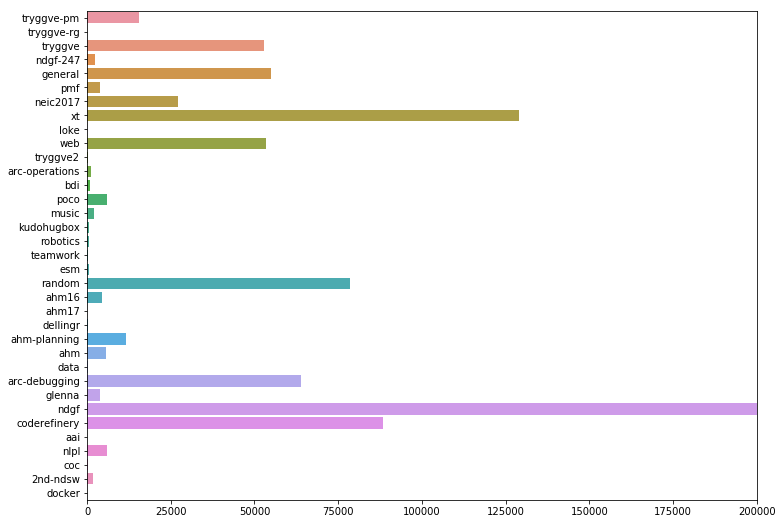

In [15]:
plt.rcParams["figure.figsize"] = [12,9]
x = words_in_channels.keys()
y = [len(words_in_channels[i]) for i in words_in_channels.keys()]
ax = sns.barplot(x=y, y=x)

ax.set_xlim([0,200000])

From now on, let's focus on the largest channels

In [16]:
channels = ["tryggve","general","xt","web","random","arc-debugging","ndgf","coderefinery"]

#### When are messages are posted?

In [51]:
timestamps_in_channels = dict.fromkeys(channels)

In [84]:
# join messages in all channels into elements of words_in_channels dict
for channel in channels:
    dates = os.listdir("slack_logs/"+channel)
    timestamps = []
    for d in dates: 
        with open("slack_logs/"+channel+"/"+d,"r") as f:
            raw_json = json.loads(f.read())

        for j in raw_json:
            if not "subtype" in j.keys(): # exclude non-message messages
                timestamps.append(j["ts"])
    timestamps_in_channels[channel] = timestamps

In [95]:
import datetime
dfs = {}
tmp = []
#for i in timestamps_in_channels["coderefinery"]:
    #print(datetime.datetime.fromtimestamp(int(float(i))))
for channel in channels:
    unixtime = timestamps_in_channels[channel]
    timestamps = [datetime.datetime.fromtimestamp(int(float(i))).strftime('%Y-%m-%d %H:%M:%S')
                  for i in unixtime]
    dfs[channel] = pd.DataFrame(data=timestamps)
    dfs[channel] = dfs[channel].astype("datetime64")
    dfs[channel].columns = ["time"]
    tmp.append(timestamps)
    print("first message in {} was posted on {}".format(channel,timestamps[0]))

first message in tryggve was posted on 2015-06-02 14:30:37
first message in general was posted on 2015-05-22 13:17:22
first message in xt was posted on 2015-08-17 13:40:17
first message in web was posted on 2016-02-18 09:45:38
first message in random was posted on 2015-05-26 10:44:53
first message in arc-debugging was posted on 2015-08-25 14:27:33
first message in ndgf was posted on 2015-05-29 21:56:15
first message in coderefinery was posted on 2016-02-22 13:02:01


In [98]:
df2 = pd.DataFrame(data=tmp)
df2

,0,1,2,3,4,5,6,7,8,9,...,102197,102198,102199,102200,102201,102202,102203,102204,102205,102206
0,2015-06-02 14:30:37,2015-06-02 14:32:54,2015-06-02 15:11:42,2015-06-03 09:38:27,2015-06-03 13:25:37,2015-06-11 09:56:32,2015-06-11 09:59:38,2015-06-11 10:02:14,2015-06-17 11:30:47,2015-06-17 11:52:52,...,None,None,None,None,None,None,None,None,None,None
1,2015-05-22 13:17:22,2015-05-22 13:27:30,2015-05-22 13:31:53,2015-05-22 13:33:06,2015-05-22 13:33:18,2015-05-22 14:24:05,2015-05-22 15:02:25,2015-05-22 15:11:37,2015-05-22 16:12:39,2015-05-25 10:31:42,...,None,None,None,None,None,None,None,None,None,None
2,2015-08-17 13:40:17,2015-08-17 13:41:52,2015-08-17 13:41:55,2015-08-17 13:42:11,2015-08-17 13:42:45,2015-08-17 13:43:21,2015-08-17 13:43:38,2015-08-17 13:44:01,2015-08-17 13:46:01,2015-08-17 13:46:33,...,None,None,None,None,None,None,None,None,None,None
3,2016-02-18 09:45:38,2016-02-18 09:46:30,2016-02-18 09:46:35,2016-02-18 10:07:56,2016-02-18 10:09:02,2016-02-18 10:13:40,2016-02-19 13:54:42,2016-02-19 13:55:24,2016-03-03 11:15:49,2016-03-03 11:17:33,...,None,None,None,None,None,None,None,None,None,None
4,2015-05-26 10:44:53,2015-06-03 21:41:34,2015-06-03 21:52:12,2015-06-03 21:59:46,2015-06-05 09:08:39,2015-06-05 10:39:57,2015-06-05 10:43:25,2015-06-05 10:44:14,2015-06-05 10:59:13,2015-06-06 08:47:03,...,None,None,None,None,None,None,None,None,None,None
5,2015-08-25 14:27:33,2015-08-25 14:27:56,2015-08-25 14:51:39,2015-08-26 08:48:31,2015-08-26 09:01:17,2015-08-26 09:03:51,2015-08-26 09:04:42,2015-08-27 10:57:05,2015-08-28 09:30:42,2015-08-28 10:49:44,...,None,None,None,None,None,None,None,None,None,None
6,2015-05-29 21:56:15,2015-06-01 17:15:13,2015-06-01 17:31:10,2015-06-01 21:14:19,2015-06-02 14:53:20,2015-06-02 15:41:37,2015-06-05 10:38:51,2015-06-05 10:38:51,2015-06-05 10:41:51,2015-06-05 11:09:52,...,2017-12-08 16:58:38,2017-12-08 17:01:54,2017-12-08 17:34:38,2017-12-08 17:51:30,2017-12-08 17:51:37,2017-12-08 17:51:48,2017-12-08 17:59:41,2017-12-08 18:01:25,2017-12-08 18:33:30,2017-12-08 18:35:00
7,2016-02-22 13:02:01,2016-03-08 12:42:49,2016-03-08 13:04:54,2016-03-08 13:48:36,2016-03-08 13:59:49,2016-03-08 14:17:16,2016-03-08 15:26:06,2016-03-08 15:36:43,2016-03-09 11:33:06,2016-03-09 11:34:20,...,None,None,None,None,None,None,None,None,None,None


Now plot some histograms!

In [77]:
dfs["coderefinery"].columns = ["time"]
dfs["coderefinery"].head()

,time
0,2016-02-22 13:02:01
1,2016-03-08 12:42:49
2,2016-03-08 13:04:54
3,2016-03-08 13:48:36
4,2016-03-08 13:59:49


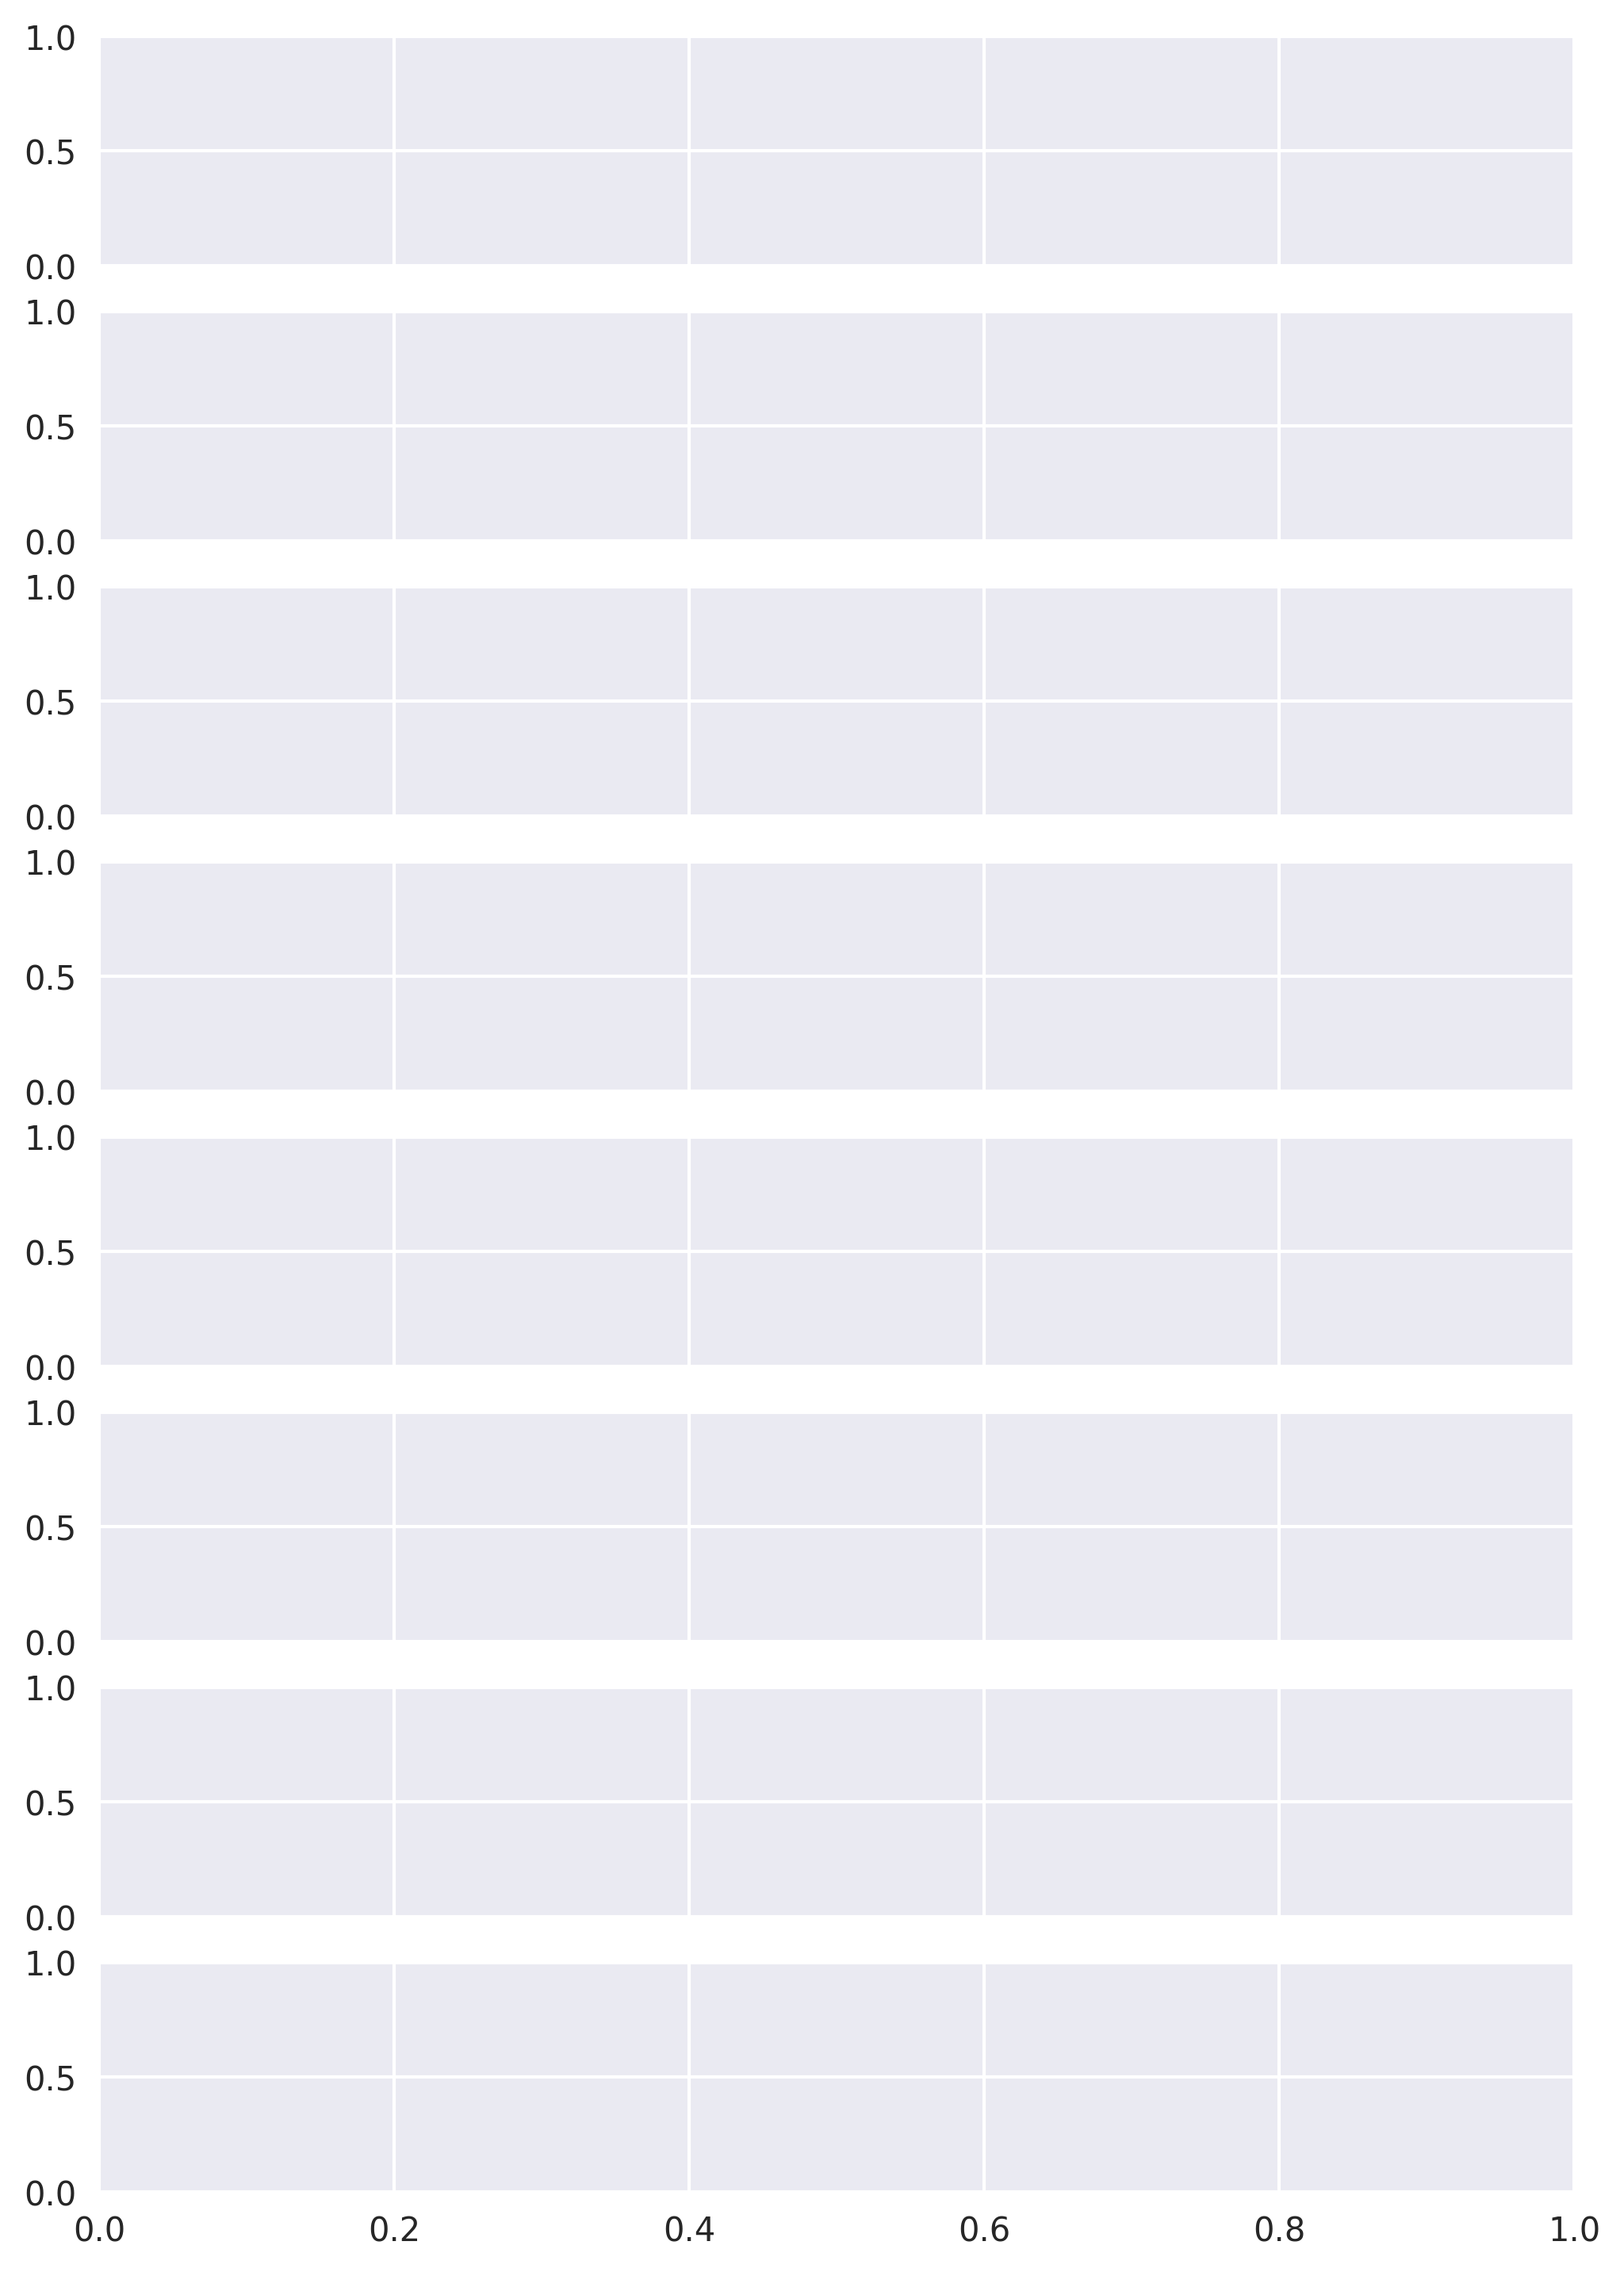

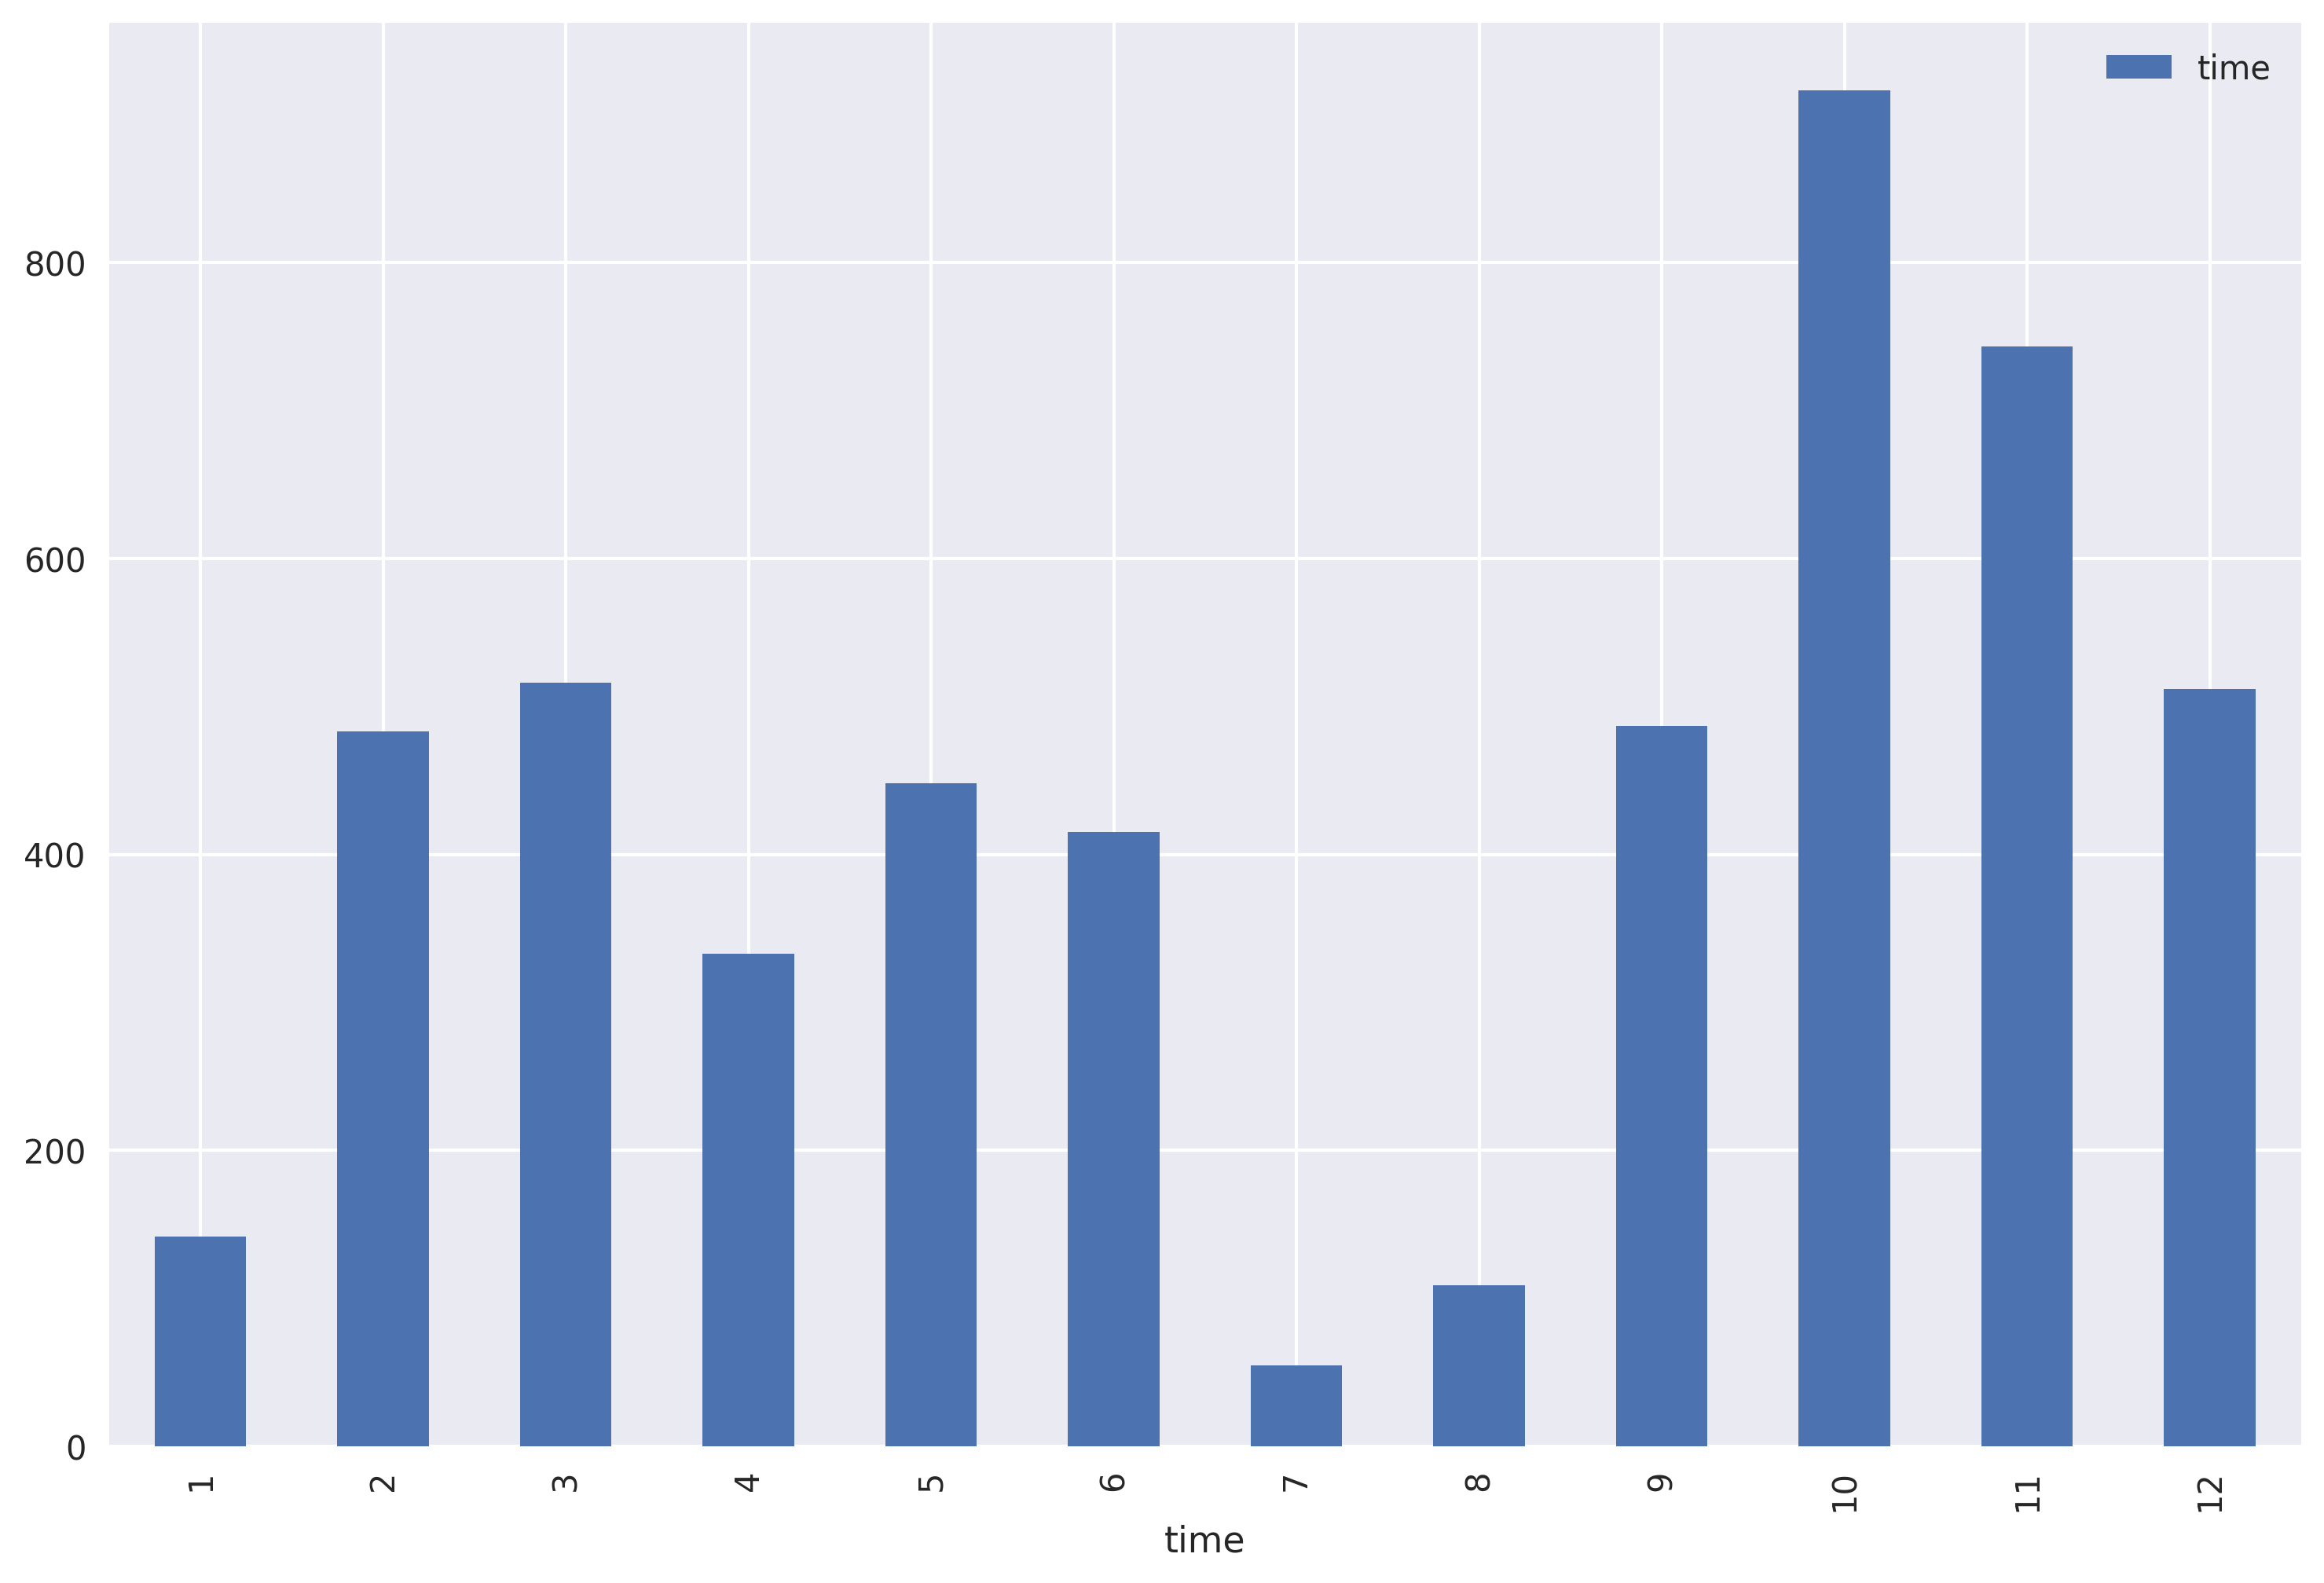

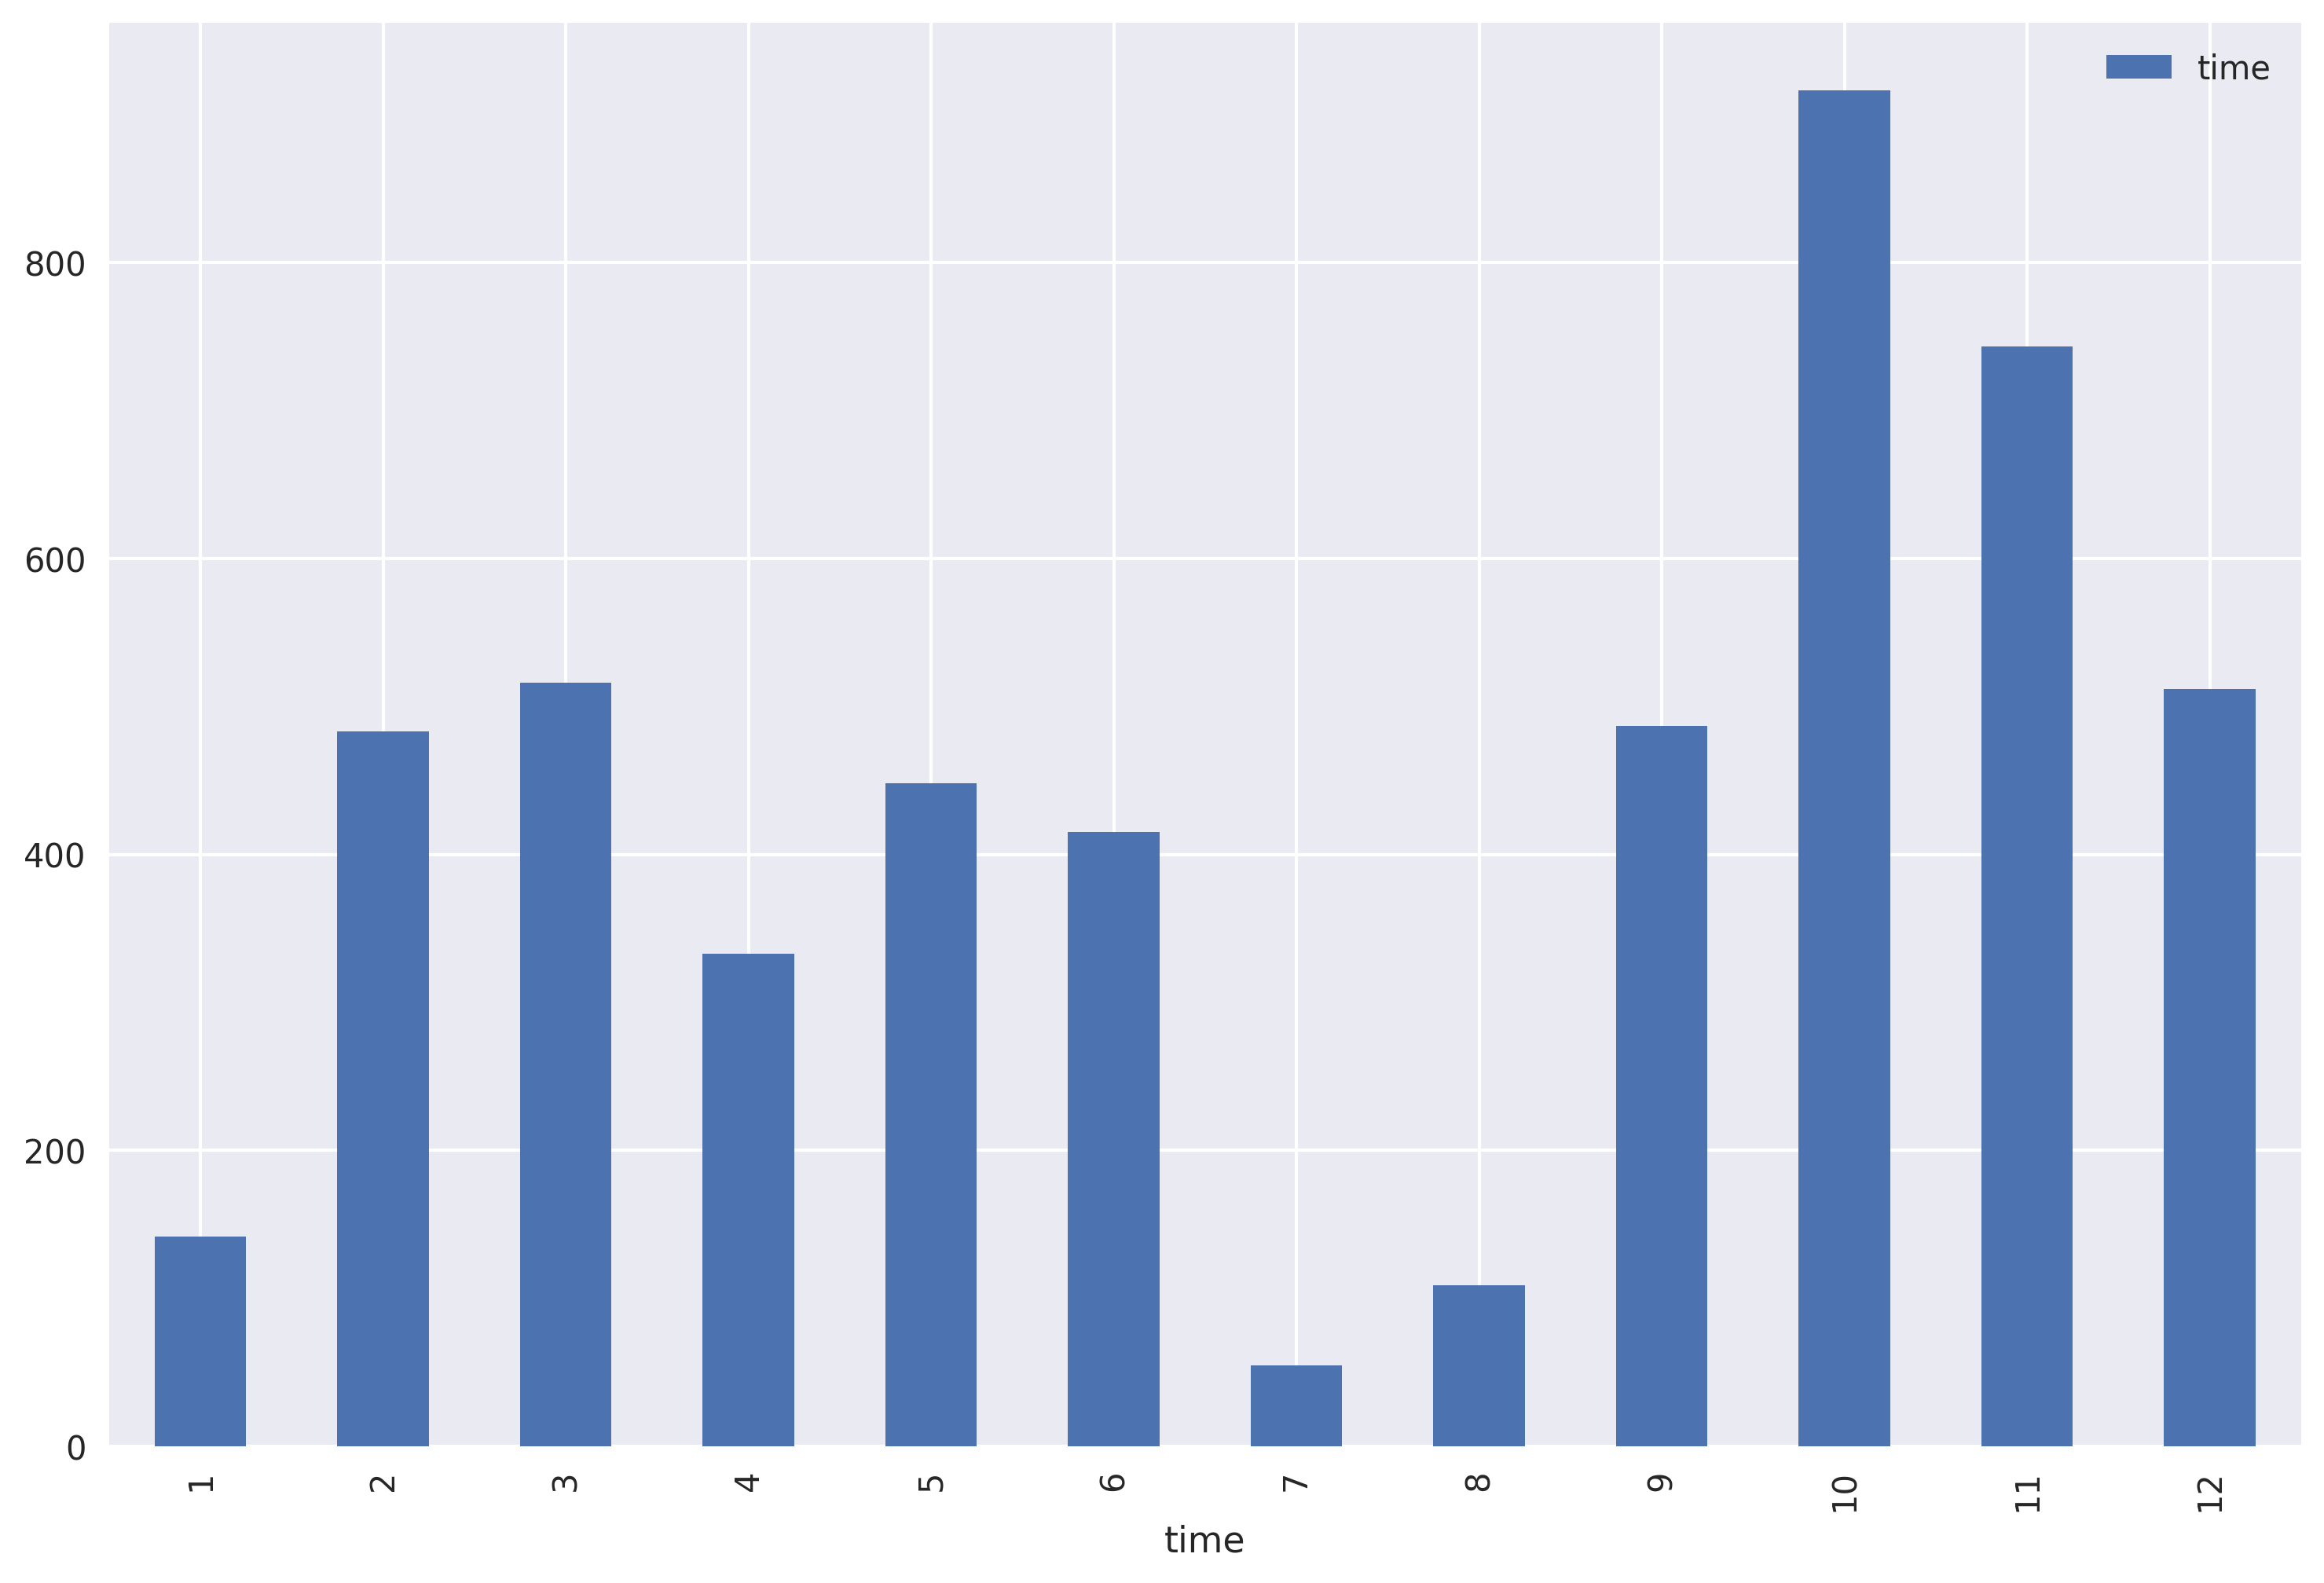

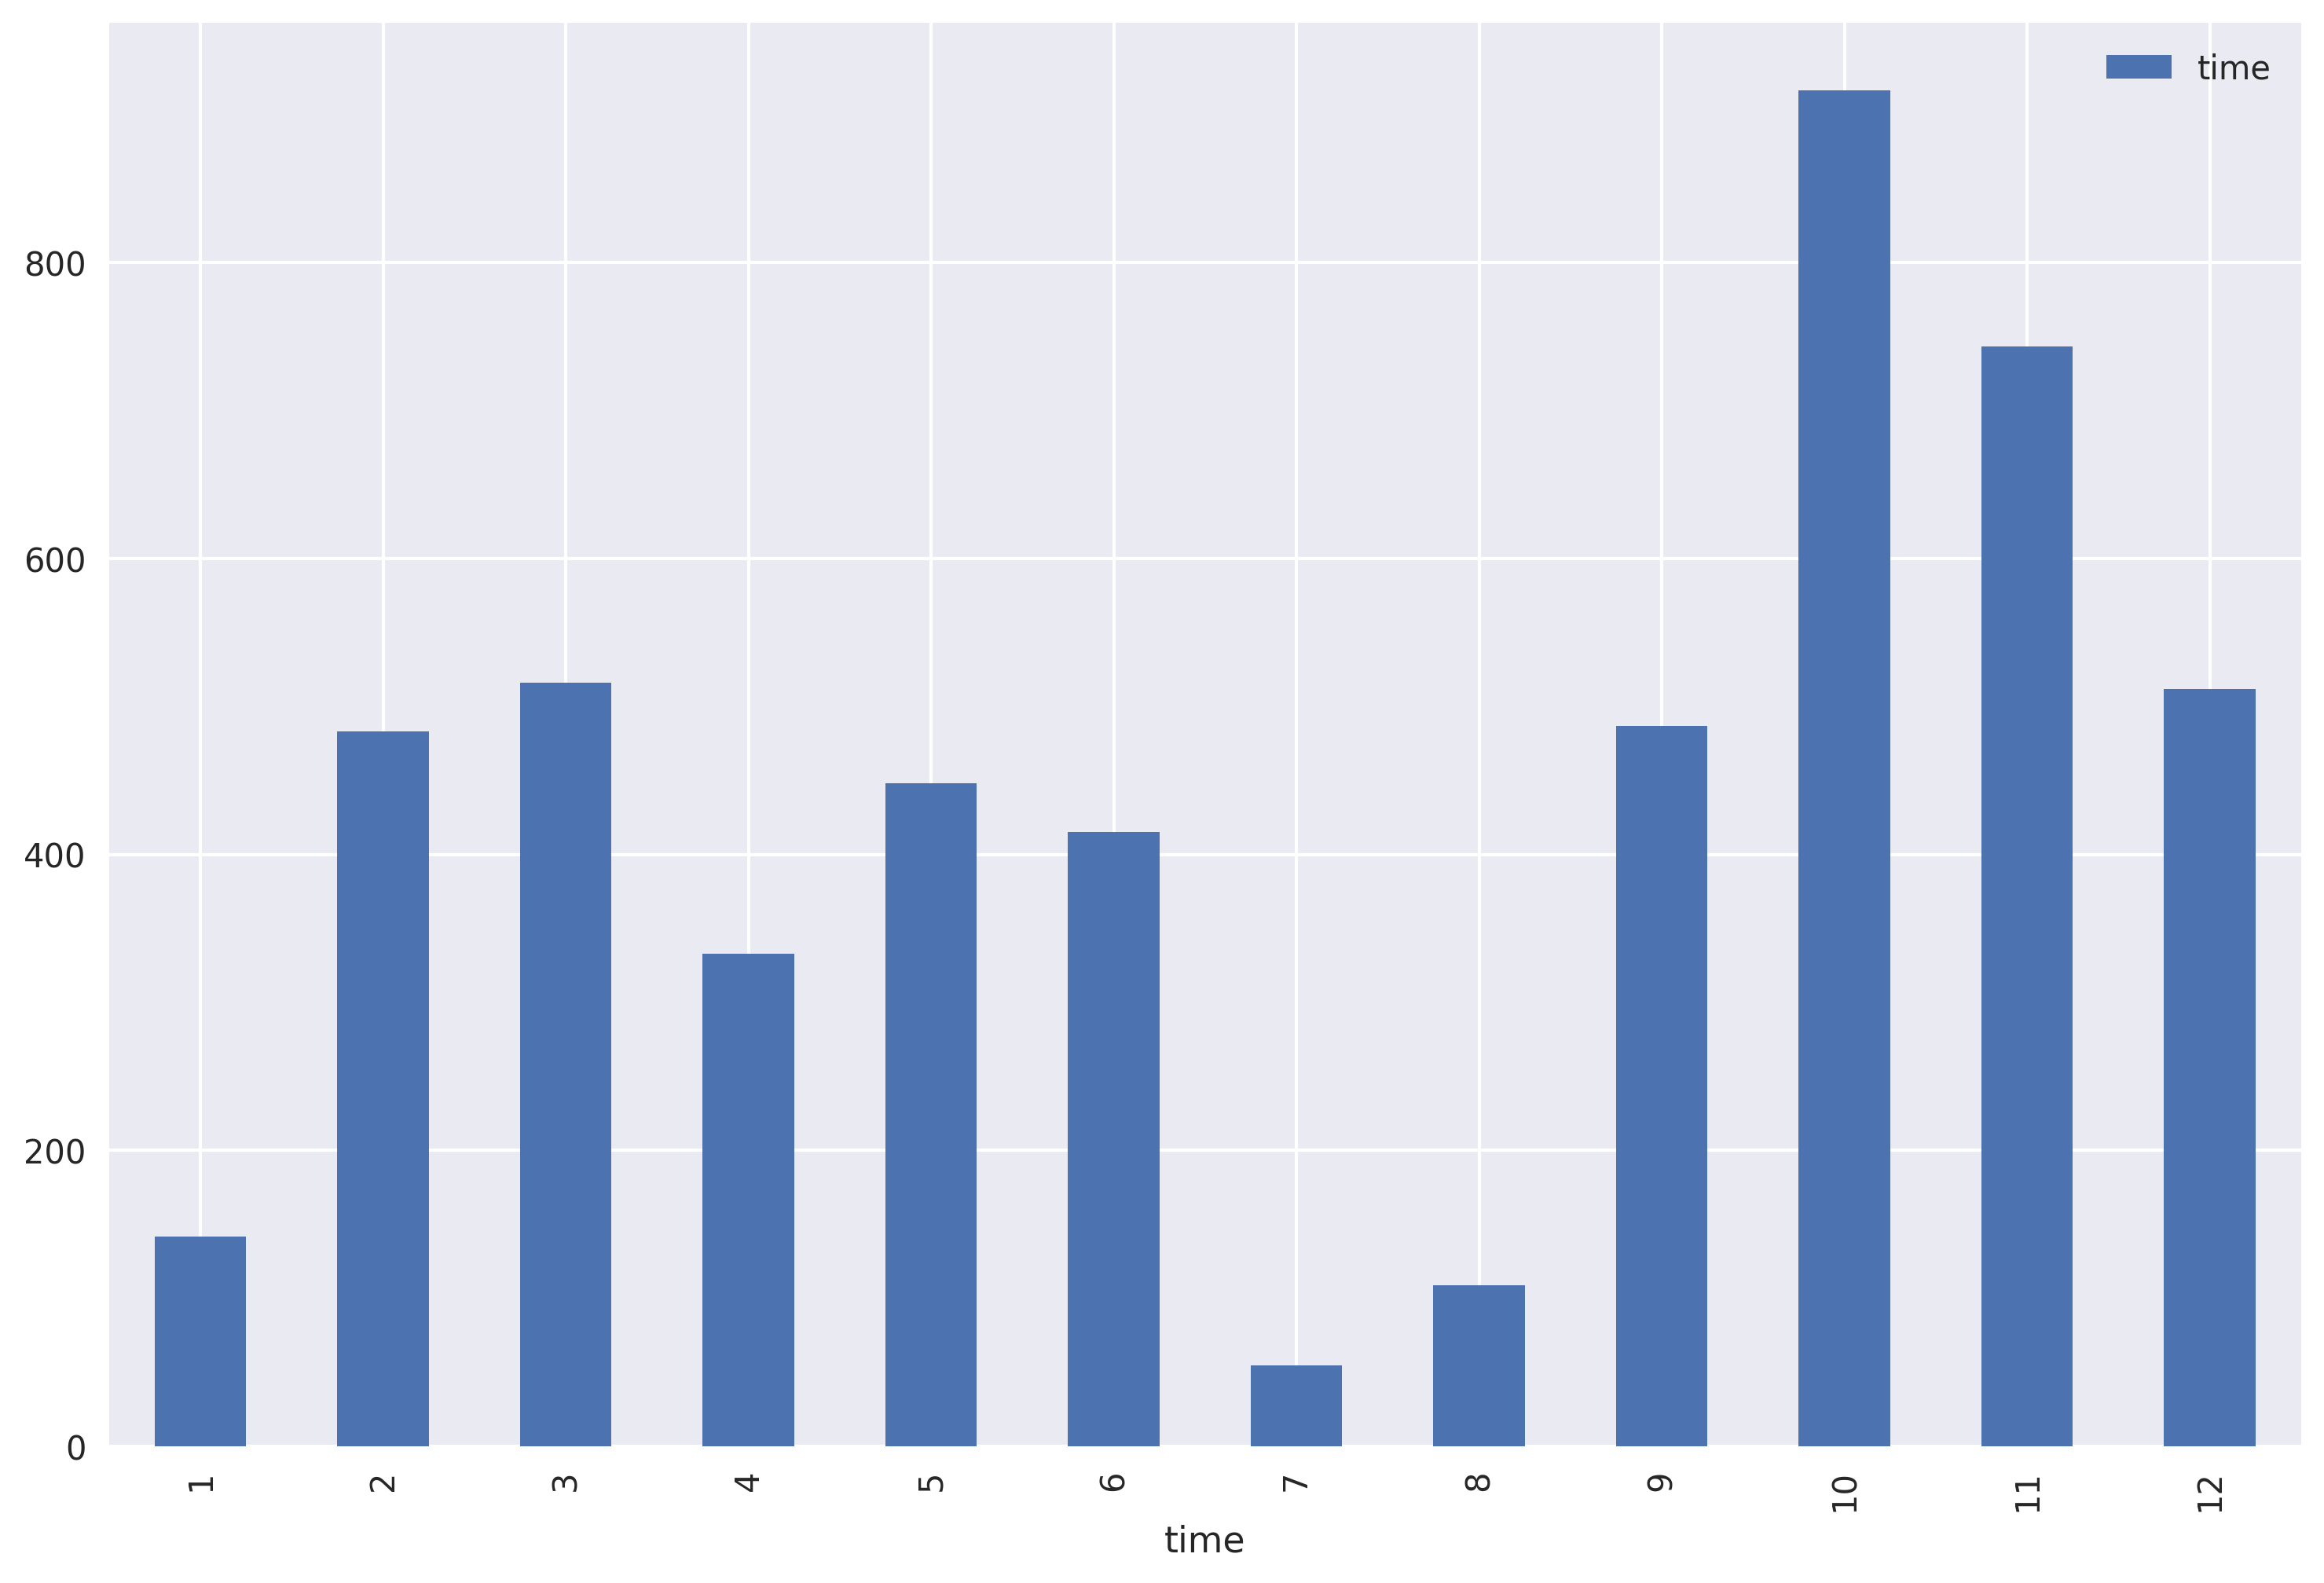

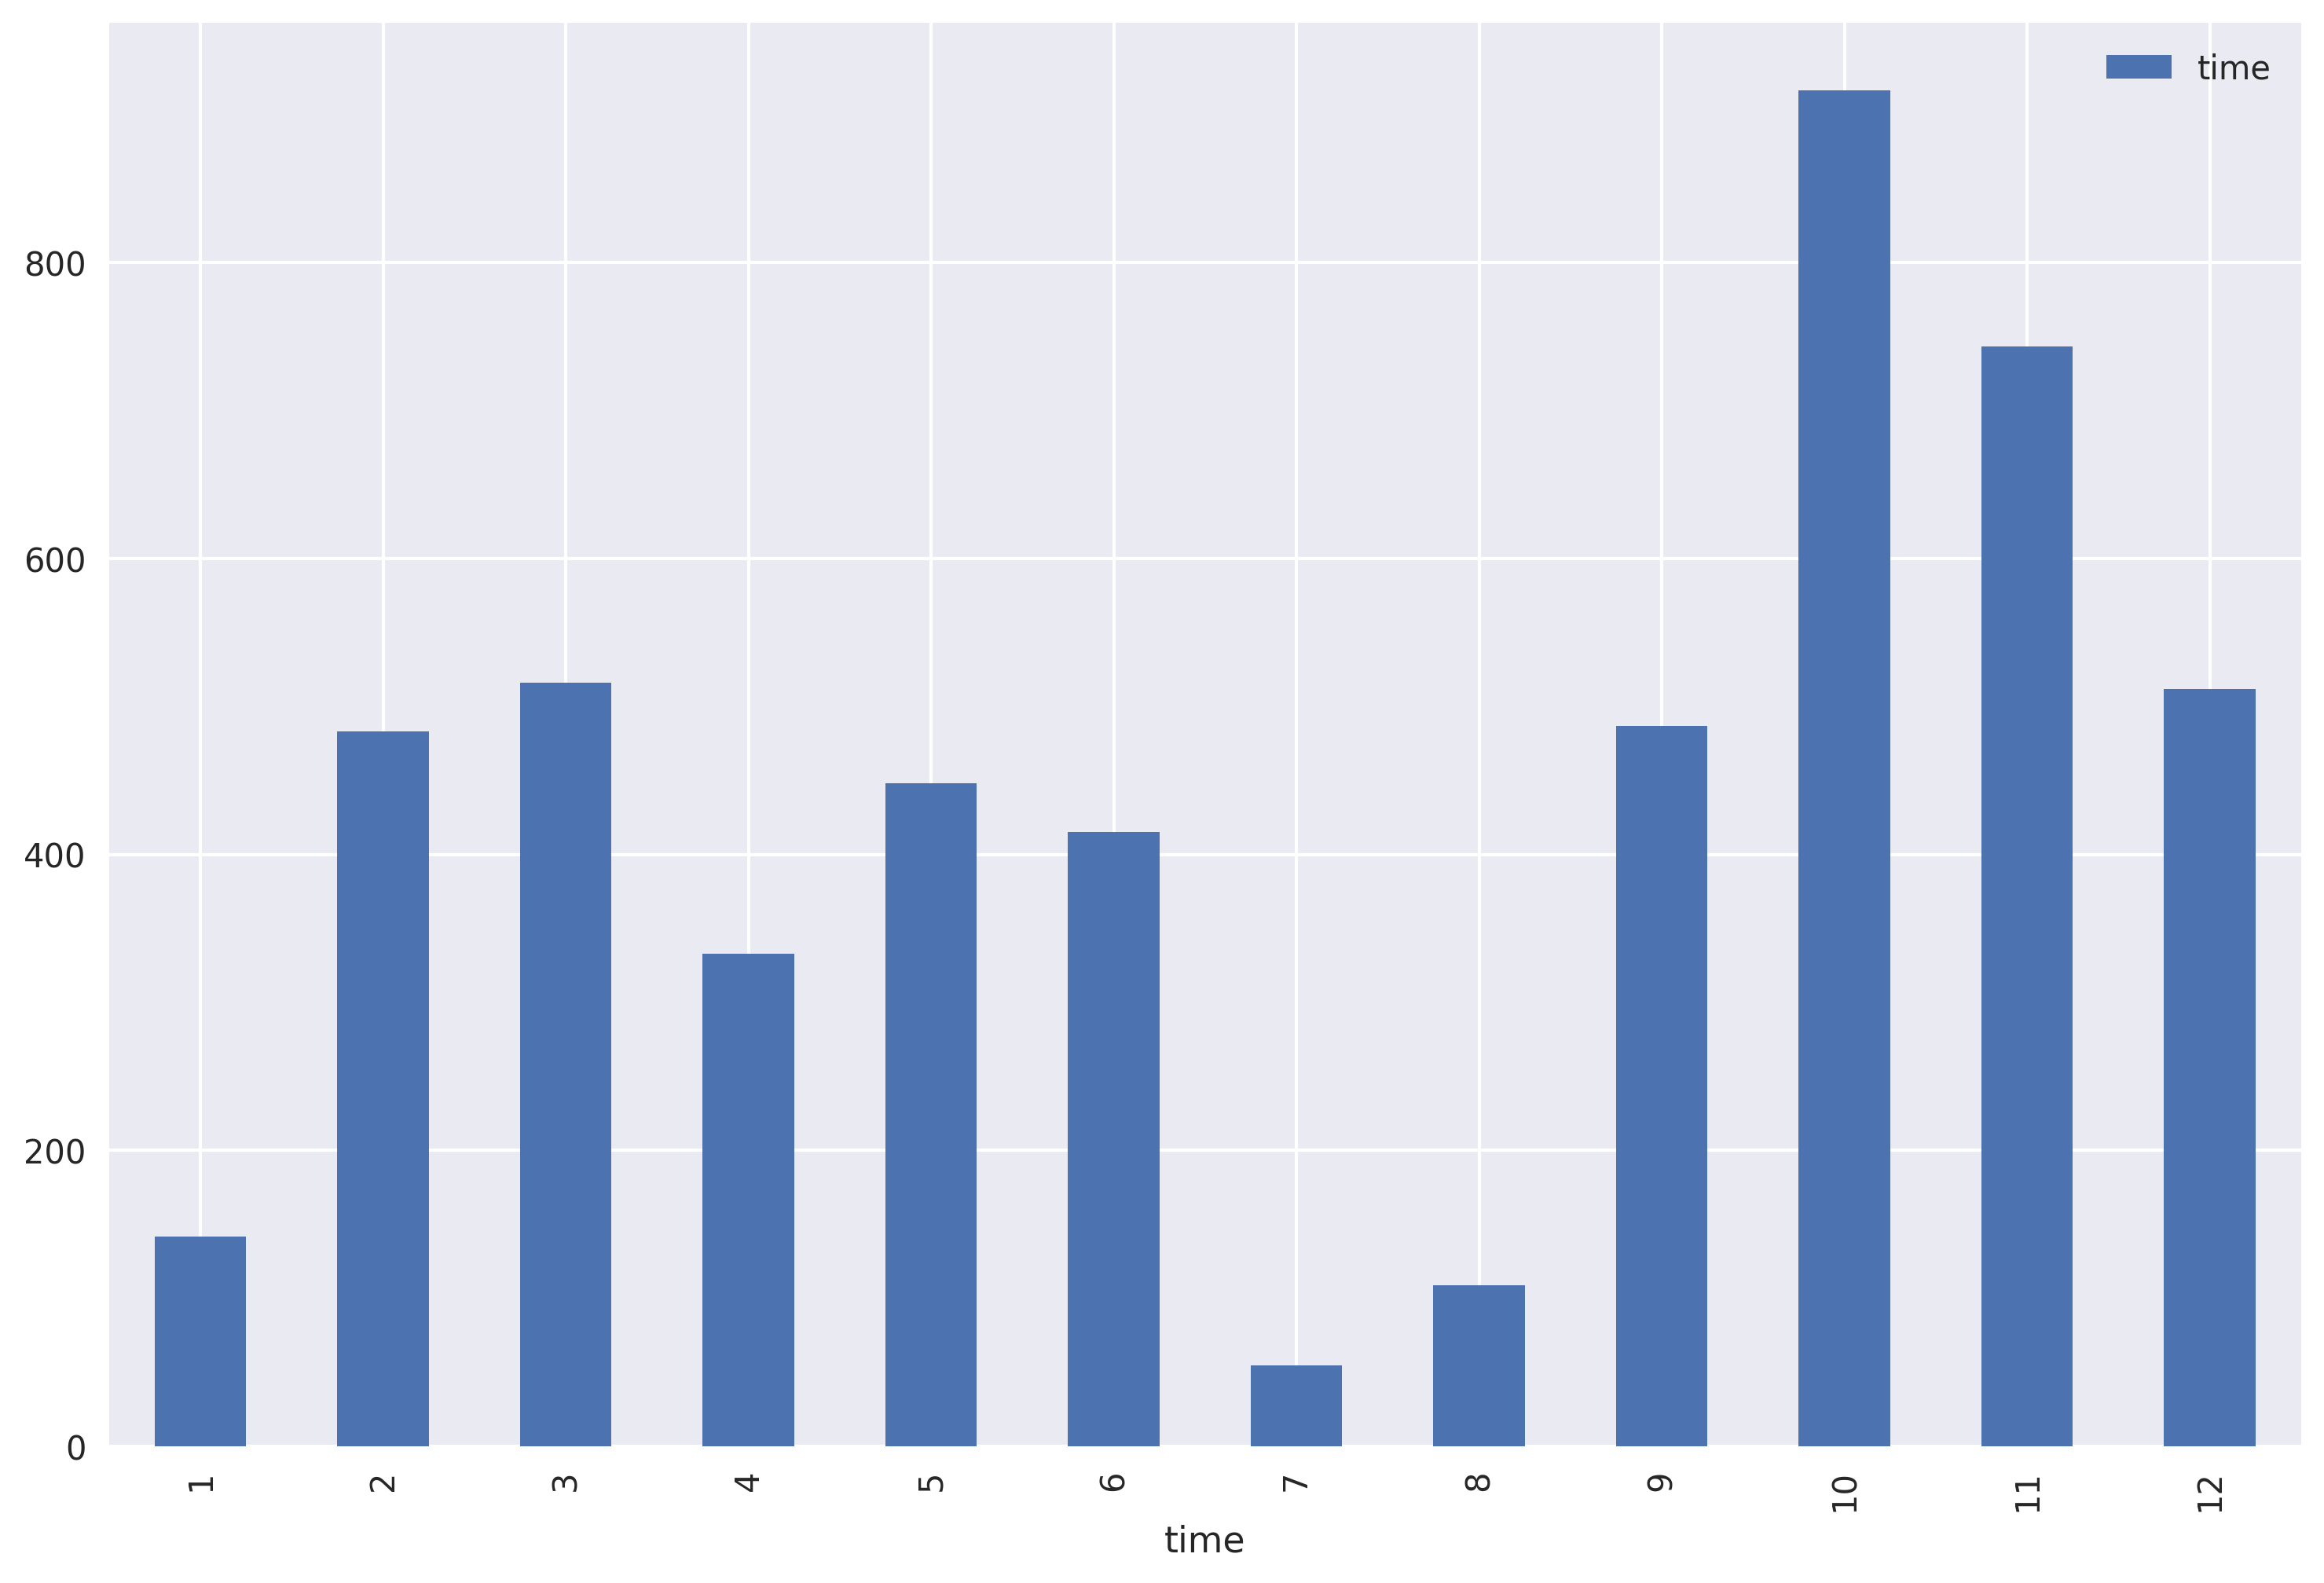

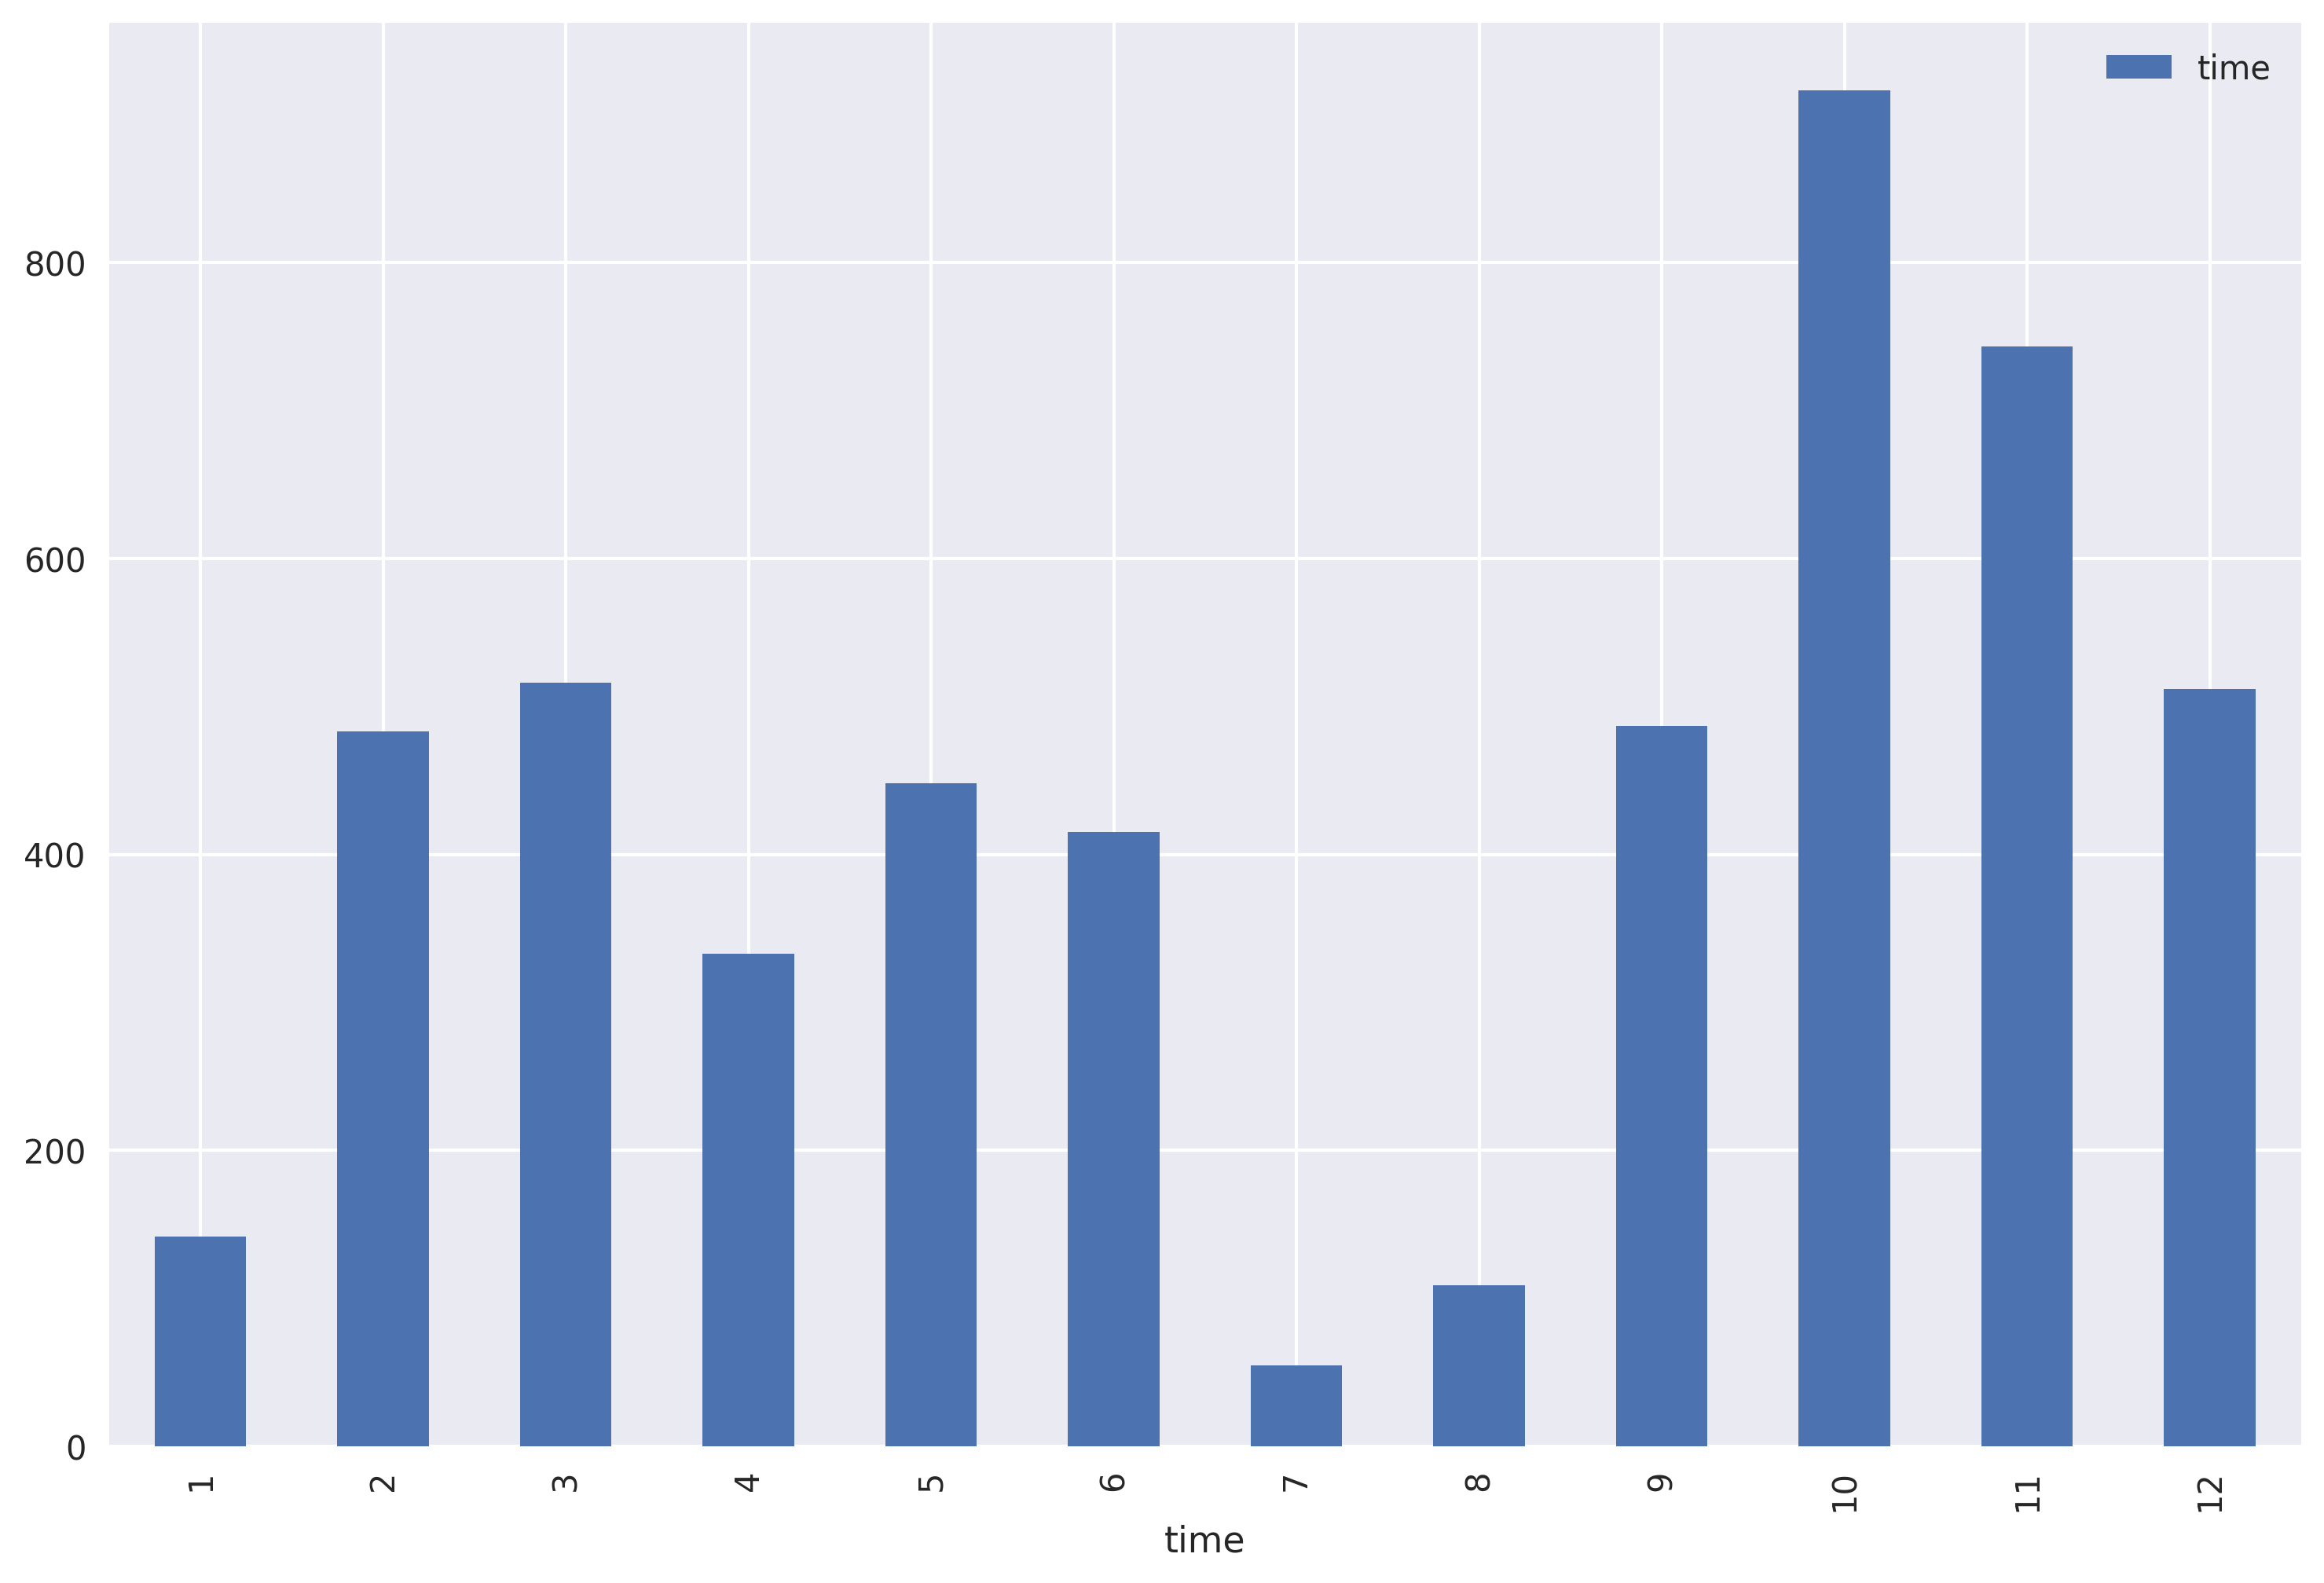

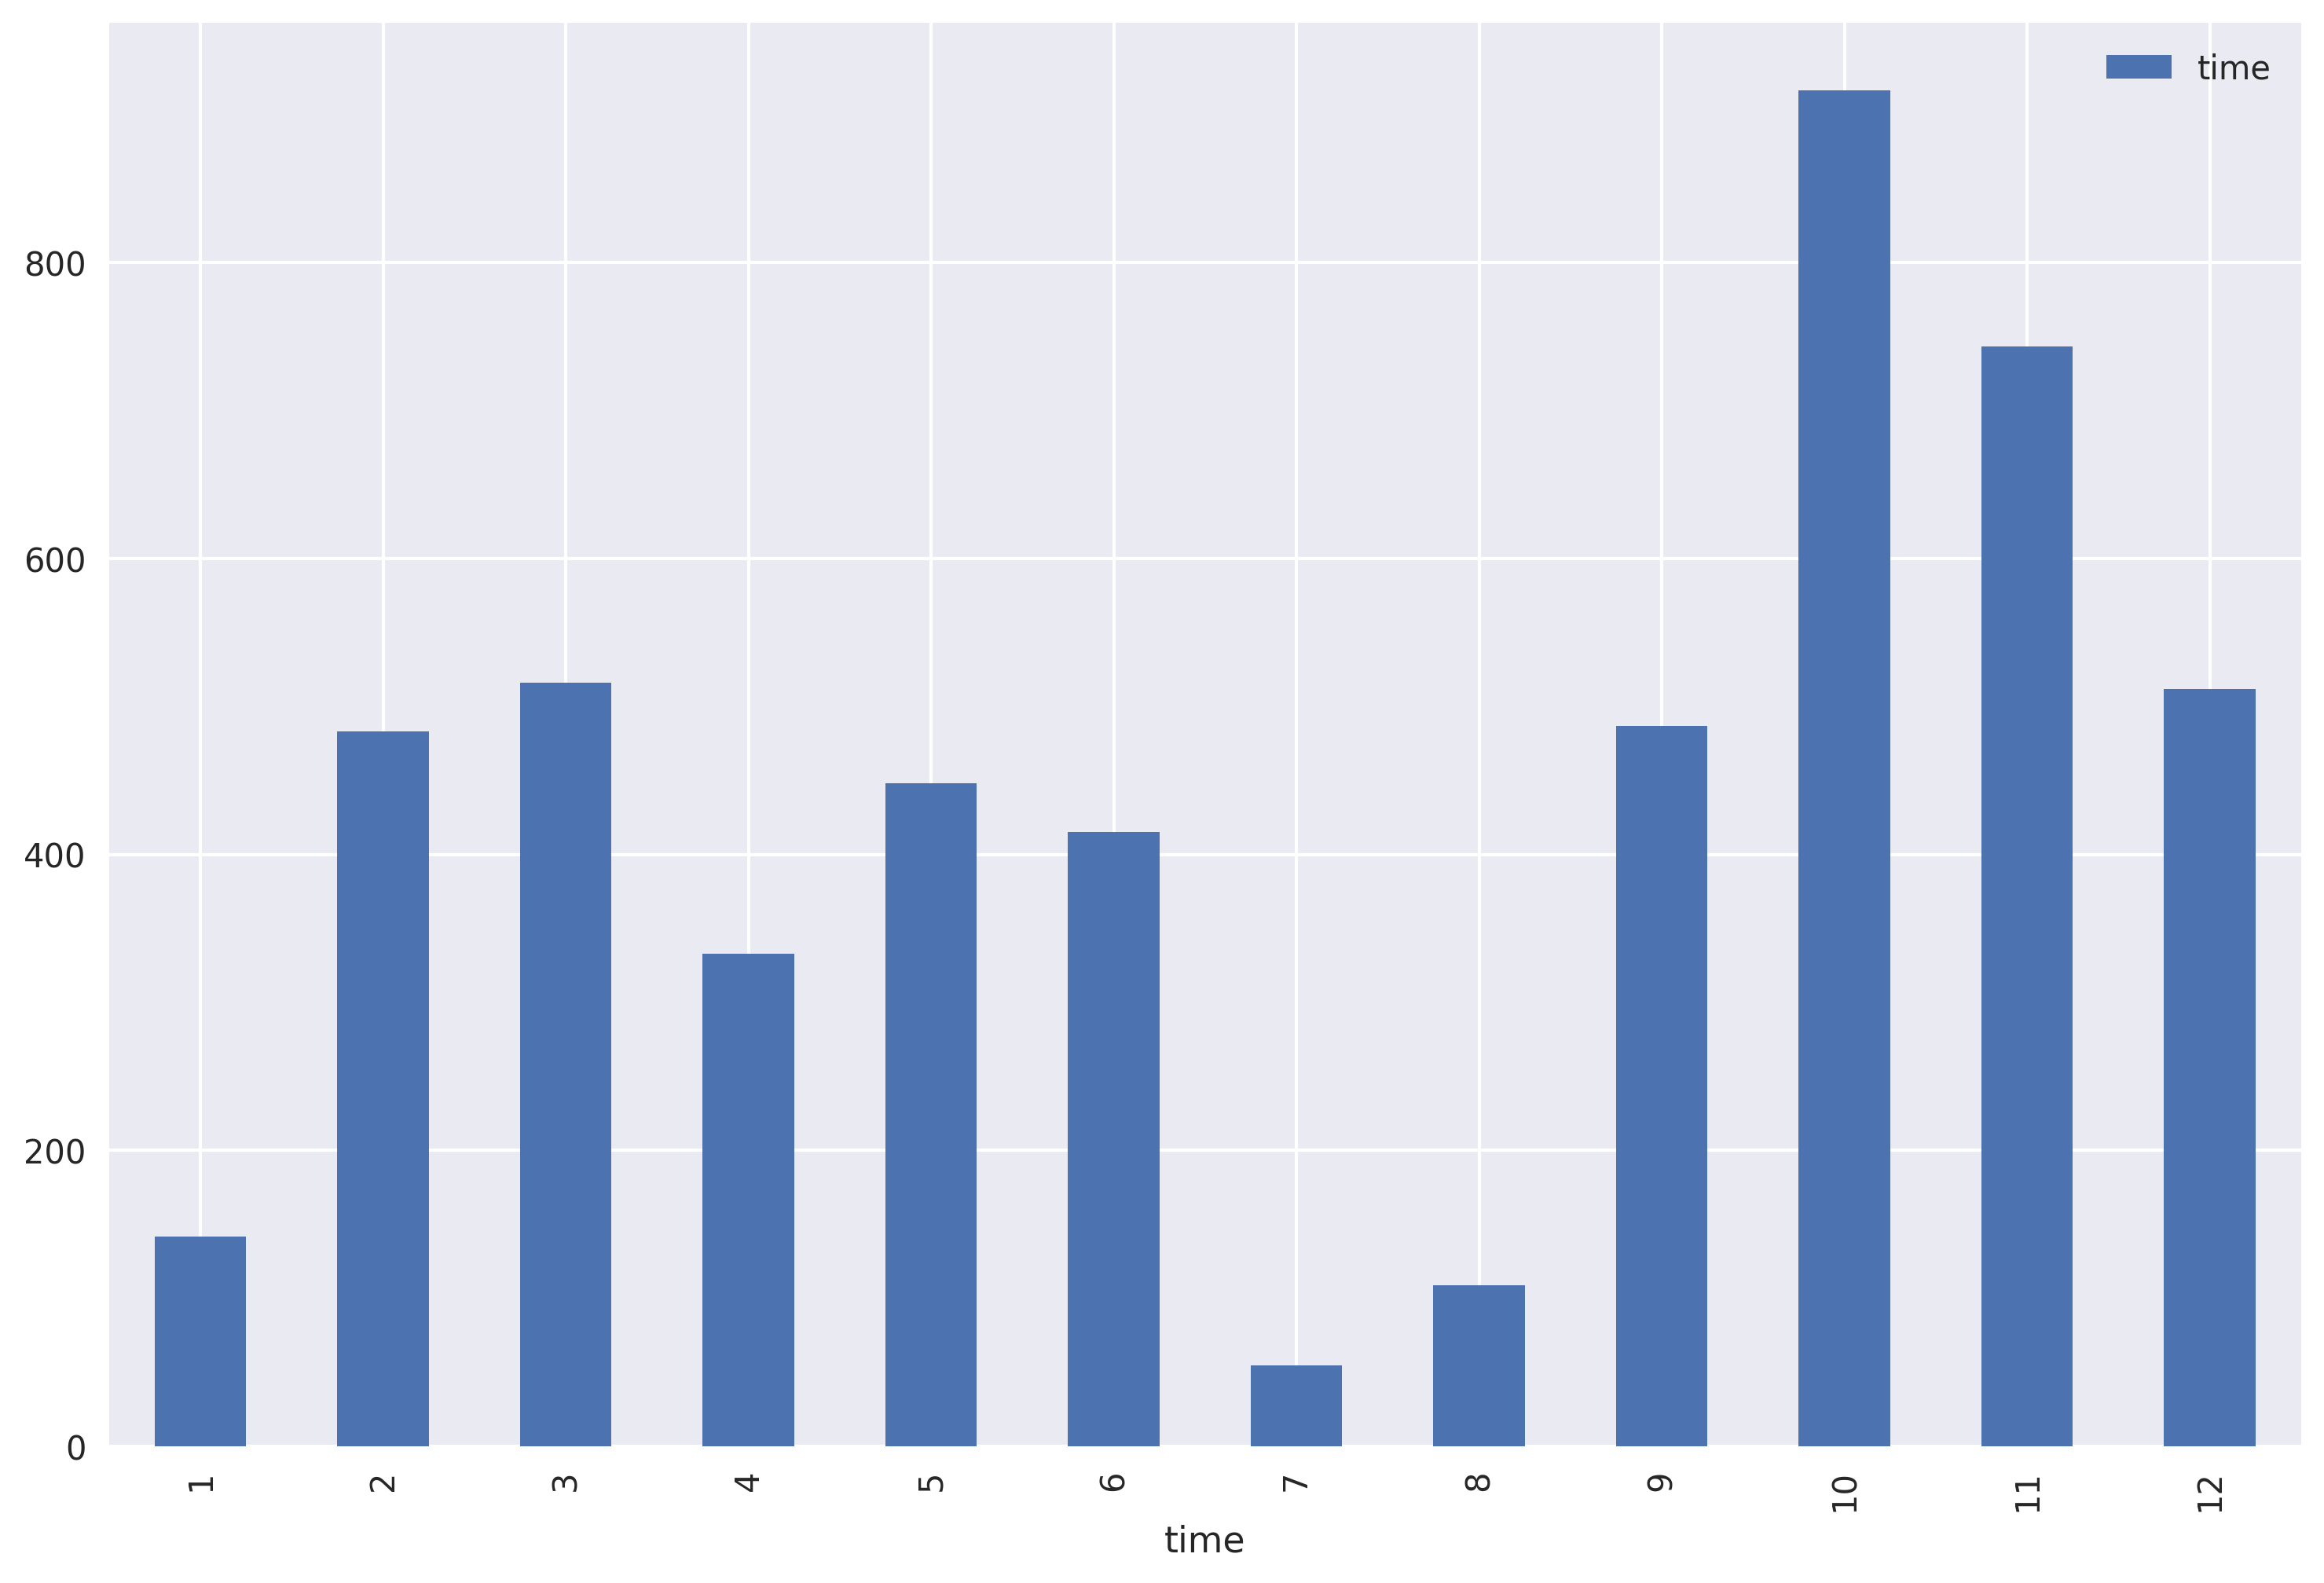

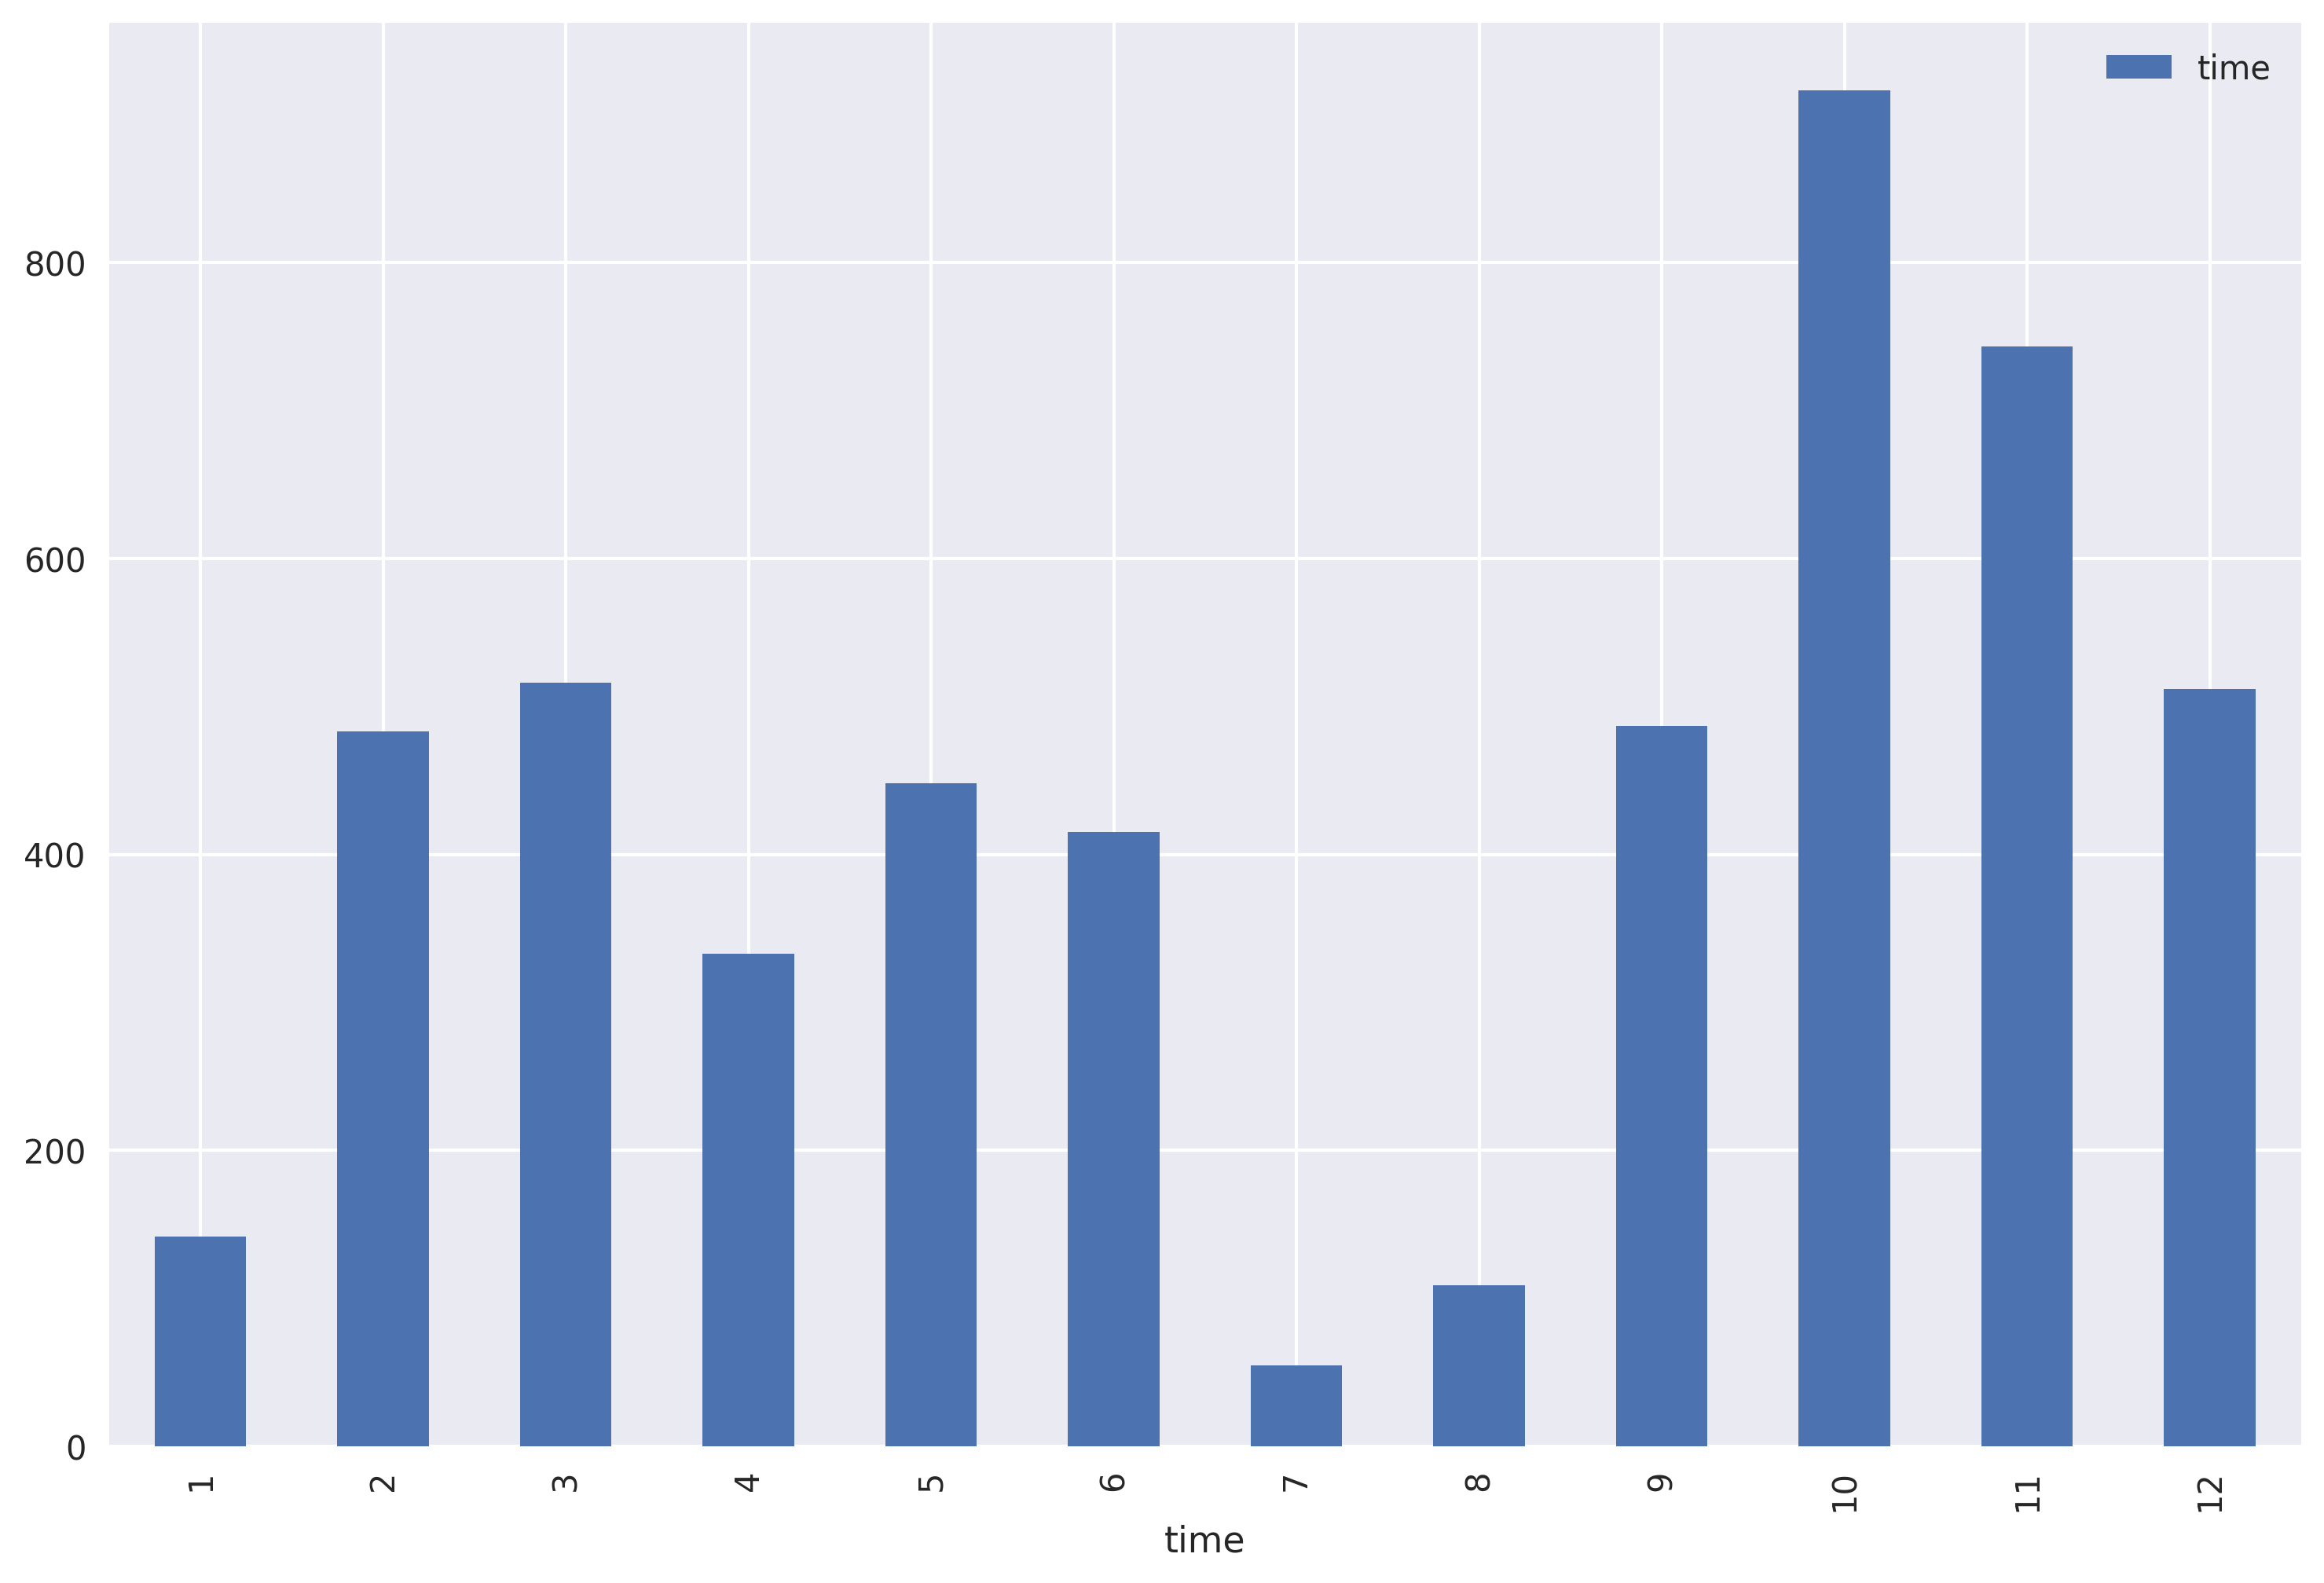

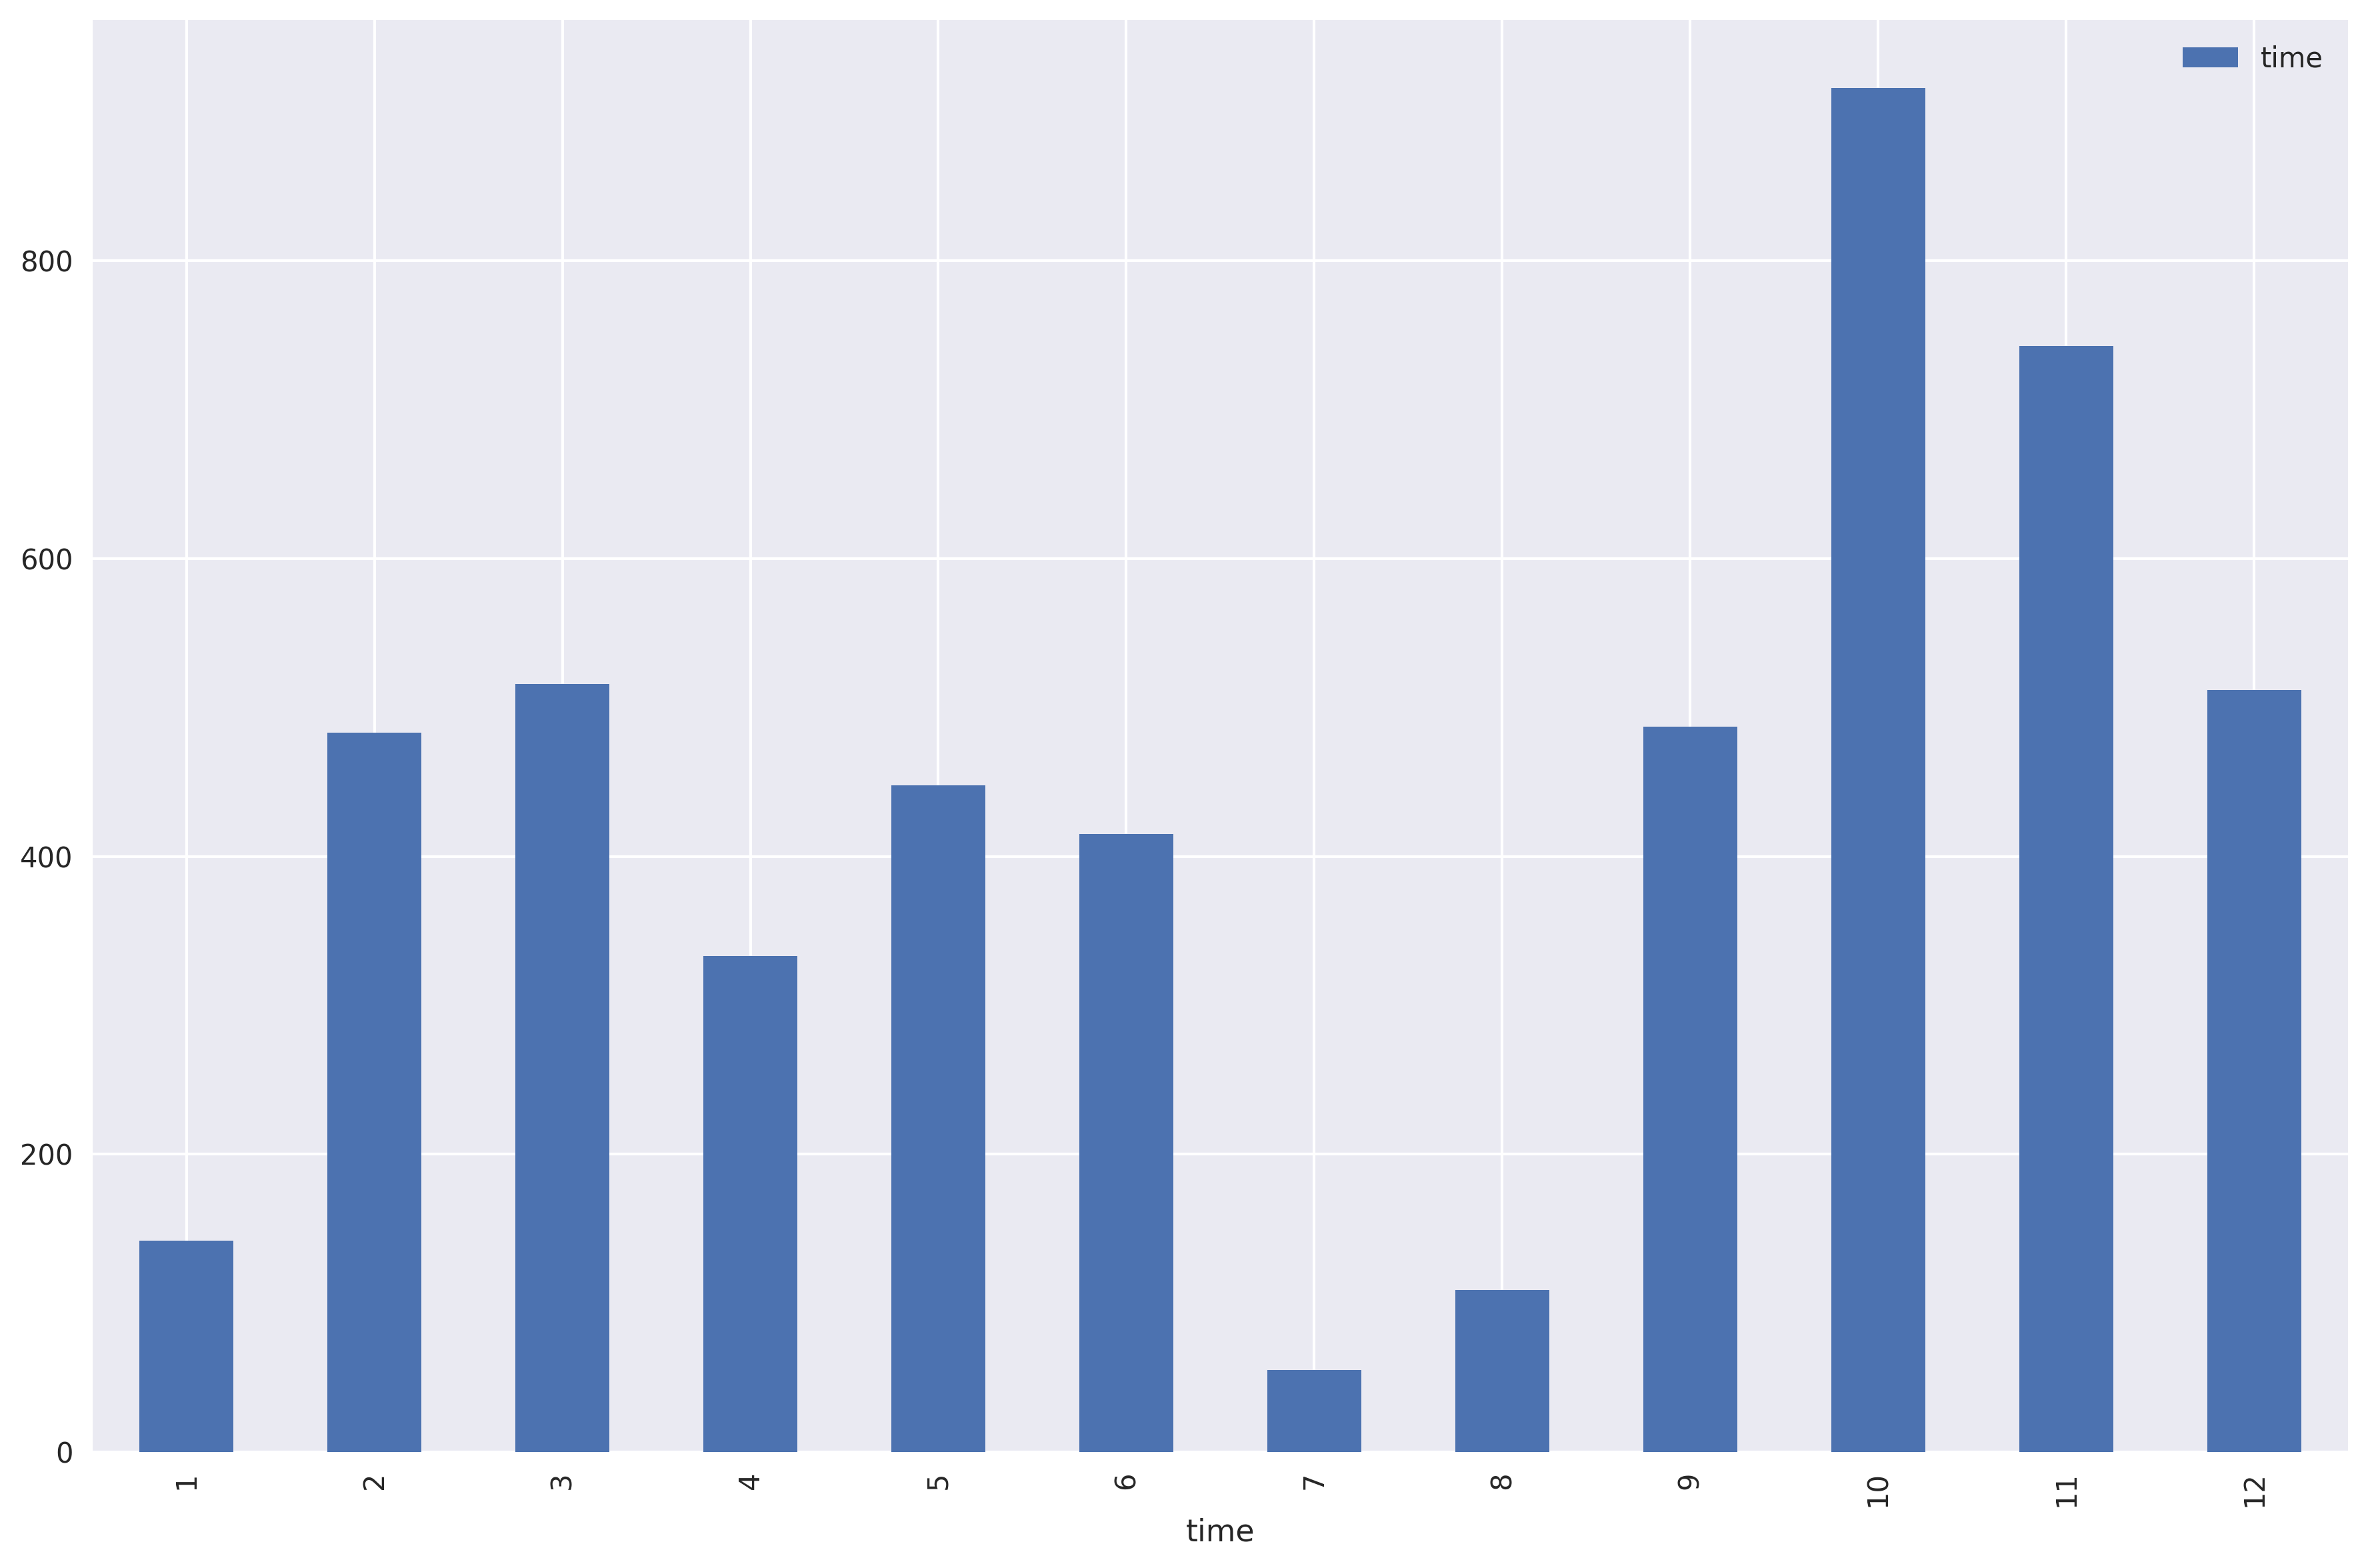

In [92]:
f, ax= plt.subplots(8, 1, figsize=(8, 12), sharex=True)
#for i, k in enumerate([0, 1, 2, 3, 4, 5, 6, 7]):
for i, k in enumerate(channels):
    df = dfs[channel]
    ax[i] = df.groupby(df["time"].dt.month).count().plot(kind="bar")
#    ax[i].set_xlim(0.5, 18.5)
#    ax[i].set_xticks(range(1,19))
#    ax[i].set_ylim(0, .3)
#    ax[i].set_ylabel("Prob")
#    ax[i].set_title("{}".format(channels[k]))

#    ax[i].set_xlabel("Topic")

plt.tight_layout()
plt.show()
#for channel in channels:
#    df = dfs[channel]
#    df.groupby(df["time"].dt.month).count().plot(kind="bar")
    #break

### Simple natural language processing

Natural language toolkit tests

In [17]:
import nltk as nltk

In [18]:
# tab completion can be used to see available methods of a module
#nltk.

#### Frequency distribution of words

In [19]:
# we can view docstrings for functions in python modules: 
nltk.FreqDist?

In [20]:
# and the source code itself can be viewed by using two question marks!
nltk.FreqDist??

In [21]:
most_common_words = dict.fromkeys(channels,0) # dictionary with channel-names as keys
dists = dict.fromkeys(channels,0) # and another one

for channel in channels:
    words = words_in_channels[channel]
    dist = nltk.FreqDist(words) #
    dists[channel] = dist
    most_common_words[channel] = dist.most_common(20)


#### Pandas dataframes

We create a dataframe to work with:

In [22]:
# we can feed a dictionary to the `DataFrame` method
df_words = pd.DataFrame(data=most_common_words)
df_words.head(30)

,arc-debugging,coderefinery,general,ndgf,random,tryggve,web,xt
0,"(the, 2819)","(the, 3451)","(the, 2034)","(the, 44223)","(the, 3120)","(the, 1993)","(the, 2276)","(the, 5209)"
1,"(to, 1514)","(to, 2920)","(to, 1626)","(to, 28047)","(to, 2051)","(to, 1596)","(to, 1729)","(to, 3752)"
2,"(is, 1325)","(i, 2542)","(i, 1244)","(i, 19936)","(a, 1851)","(i, 1288)","(i, 1292)","(i, 2869)"
3,"(i, 1247)","(and, 1717)","(a, 1014)","(is, 18188)","(i, 1615)","(you, 854)","(a, 1028)","(a, 2153)"
4,"(a, 1043)","(a, 1683)","(and, 966)","(it, 18070)","(of, 1282)","(a, 821)","(is, 808)","(and, 2065)"
5,"(it, 1012)","(we, 1496)","(is, 848)","(a, 16682)","(and, 1263)","(in, 785)","(it, 789)","(in, 2052)"
6,"(in, 936)","(is, 1430)","(in, 800)","(and, 14450)","(in, 1195)","(and, 756)","(and, 777)","(for, 1985)"
7,"(and, 902)","(it, 1340)","(of, 759)","(for, 12290)","(is, 1161)","(is, 746)","(that, 717)","(is, 1949)"
8,"(of, 766)","(for, 1213)","(it, 748)","(in, 12030)","(for, 941)","(for, 693)","(you, 688)","(you, 1626)"
9,"(that, 719)","(in, 1155)","(for, 719)","(that, 11804)","(you, 918)","(it, 624)","(for, 645)","(of, 1493)"


In [23]:
# we can get a list of unique common words with a set()
common_words = set()
for index, row in df_words.iterrows():
    for r in row:
        common_words.add(r[0])
common_words

{u'-',
 u'a',
 u'and',
 u'are',
 u'at',
 u'be',
 u'but',
 u'can',
 u'for',
 u'have',
 u'i',
 u'if',
 u'in',
 u'is',
 u'it',
 u'my',
 u'not',
 u'of',
 u'on',
 u'so',
 u'that',
 u'the',
 u'this',
 u'to',
 u'tryggve',
 u'was',
 u'we',
 u'will',
 u'with',
 u'you'}

### Lexical diversity (type-token ratio)

Let's look at lexical diversity, i.e. the ratio of number of distinct words and total number of words

In [24]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

In [25]:
for channel in channels: # loop over the largest channels
    words = words_in_channels[channel]
    lex_div = lexical_diversity(words)
    print("Lexical diversity in %s is %f"%(channel,lex_div))

Lexical diversity in tryggve is 0.169294
Lexical diversity in general is 0.191821
Lexical diversity in xt is 0.138659
Lexical diversity in web is 0.169905
Lexical diversity in random is 0.204878
Lexical diversity in arc-debugging is 0.150530
Lexical diversity in ndgf is 0.066855
Lexical diversity in coderefinery is 0.127306


Linguistic richness is clearly greatest in `random`, closely followed by `general`!

### Collocations, contexts and similar words

In [26]:
nltk.word_tokenize?

In [27]:
nltk.Text?

In [28]:
nltk.Text.collocations?

**Collocations (sequences of words that co-occur more often than expected by chance)**

In [29]:
for channel in channels:
    words = words_in_channels[channel]
    all_words = " ".join(words)
    tokens = nltk.word_tokenize(all_words)
    text = nltk.Text(tokens)
    print(channel)
    print("------------")
    text.collocations()
    print("------------------------------------------------")
    print("")


tryggve
------------
tryggve hangout; live minutes; weekly meeting; use case; local ega;
meeting today; 13:00 cet; next week; tryggve weekly; feel free;
popular kudos; kudos received; sftp beamer; normal time; sensitive
data; last week; tyttebär hangout; looks like; trello cards; joakim
dillner
------------------------------------------------

general
------------
would like; good luck; n't know; internal wiki; google docs; neic
board; looks like; open source; live minutes; next week; looking
forward; 3.0 workout; pull requests; board meeting; `0` reactions;
feel free; hands meeting; take care; sensitive data; nordic software
------------------------------------------------

xt
------------
good morning; next week; stakeholder engagement; resource sharing;
missing abstract; sensitive data; feel free; looks like; google drive;
poco planning; steering group; board meeting; use cases; internal
wiki; session day; would like; sounds like; live minutes; neic 2017;
project directive
---------

tyttebär hangout??

**Searching for words**

What do people in different channels find boring?

In [30]:
for channel in channels:
    words = words_in_channels[channel]
    all_words = " ".join(words)
    tokens = nltk.word_tokenize(all_words)
    text = nltk.Text(tokens)
    print(channel)
    print("------------")
    text.concordance("boring")
    print("------------------------------------------------")
    print("")



tryggve
------------
Displaying 1 of 1 matches:
uess that should be more tedious or boring than web-based solution < @ u09q9fa
------------------------------------------------

general
------------
Displaying 4 of 4 matches:
policies and such , sorry for being boring : - ) i do n't know of anyone answe
ack to nordic software lab - too `` boring '' ? not scientific enough ? do you
 salsa lessons ? i find salsa a bit boring , would prefer something with a lit
the future . and life doesn ’ t get boring : tomorrow we meet with etais to di
------------------------------------------------

xt
------------
Displaying 7 of 7 matches:
s with the working group ? just the boring stuff , sorry ok , i 'll join for a
omorrow 's sessions look a bit more boring . : ) my first action this time aro
t the intoxication bonanza and into boring gate land . it was marvelous . the 
ok , if i get no more help i do the boring tweet above . or someone else , sin
 should actually focus on something boring and sch

Words that appear in similar contexts:

In [31]:
nltk.Text.similar?

In [32]:
for channel in channels:
    words = words_in_channels[channel]
    all_words = " ".join(words)
    tokens = nltk.word_tokenize(all_words)
    text = nltk.Text(tokens)
    print(channel)
    print("------------")
    text.similar("good")
    print("------------------------------------------------")
    print("")


tryggve
------------
nice up better possible hard thanks easier available ok useful able
soon yes fine interesting seems waiting easy then now
------------------------------------------------

general
------------
nice the possible long hard easy short used real bit cool great decent
cf happy similar is same new serious
------------------------------------------------

xt
------------
interesting useful great this not relevant ok that possible but okay
it ready well there to fine new better now
------------------------------------------------

web
------------
fine better ok nice okay possible that easy safe bad used over thanks
yes trying pointing trivial simple easier meant
------------------------------------------------

random
------------
bad supposed not difficult hard free it nice used possible just
planning going easy reasonable small mandatory new willing great
------------------------------------------------

arc-debugging
------------
nice updated bad have found hard used l

## "Sentiment analysis": emojis!

Emojis in the Slack logs are expressed like `:slightly_smiling_face:` 

In [33]:
# join words from all channels into one list, and then join into one long "sentence"
import re

words = [j for i in words_in_channels.values() for j in i] 
all_words = " ".join(words)

emojis = re.findall(r":[a-zA-Z_]+:",all_words) # this filters out strings like :43:

dist = nltk.FreqDist(emojis)
dist.most_common(30)


[(u':slightly_smiling_face:', 1666),
 (u':simple_smile:', 582),
 (u':wink:', 321),
 (u':smile:', 244),
 (u':disappointed:', 212),
 (u':clap:', 71),
 (u':thumbsup:', 66),
 (u':stuck_out_tongue:', 56),
 (u':grinning:', 43),
 (u':star:', 34),
 (u':champagne:', 33),
 (u':tada:', 32),
 (u':e:', 30),
 (u':blush:', 26),
 (u':confused:', 23),
 (u':mm:', 22),
 (u':beef:', 20),
 (u':beers:', 20),
 (u':fire:', 19),
 (u':sunglasses:', 19),
 (u':tyttebar:', 18),
 (u':coffee:', 17),
 (u':cc:', 17),
 (u':relieved:', 17),
 (u':newspaper:', 16),
 (u':sweat_smile:', 15),
 (u':cake:', 14),
 (u':cafe:', 14),
 (u':joy:', 13),
 (u':dc:', 12)]

Let's find the unique emojis

Let's investigate a few key emojis

In [34]:
import emoji
common_emojis = [u":disappointed:",u":wink:",u":slightly_smiling_face:",u":simple_smile:",
              u":thumbsup:",u":clap:",u":stuck_out_tongue:",u":smile:",u":grinning:"]

for i in common_emojis:
    print(emoji.emojize('NeIC is %s'%i, use_aliases=True))
    print(i)
    print("------------------")

NeIC is 😞
:disappointed:
------------------
NeIC is 😉
:wink:
------------------
NeIC is 🙂
:slightly_smiling_face:
------------------
NeIC is :simple_smile:
:simple_smile:
------------------
NeIC is 👍
:thumbsup:
------------------
NeIC is 👏
:clap:
------------------
NeIC is 😛
:stuck_out_tongue:
------------------
NeIC is 😄
:smile:
------------------
NeIC is 😀
:grinning:
------------------


hmm, `emoji` package doesn't understand `:simple_smile:`

Let's count how often emojis are used in the different channels

In [35]:
channel_emojis = dict.fromkeys(channels,0)
 
for channel in channels:
    words = words_in_channels[channel]
    count = [words.count(i) for i in common_emojis]
    channel_emojis[channel] = count

channel_emojis

{'arc-debugging': [11, 11, 111, 24, 0, 0, 0, 0, 0],
 'coderefinery': [4, 14, 189, 2, 1, 0, 6, 6, 1],
 'general': [4, 39, 120, 47, 2, 3, 2, 17, 4],
 'ndgf': [121, 60, 527, 321, 1, 0, 10, 38, 1],
 'random': [18, 45, 144, 36, 6, 6, 10, 37, 1],
 'tryggve': [17, 30, 118, 34, 2, 21, 6, 33, 10],
 'web': [4, 7, 98, 9, 0, 2, 6, 21, 0],
 'xt': [18, 61, 103, 66, 29, 20, 9, 44, 5]}

In [36]:
df_emojis = pd.DataFrame(data=channel_emojis)
df_emojis.head(10)

,arc-debugging,coderefinery,general,ndgf,random,tryggve,web,xt
0,11,4,4,121,18,17,4,18
1,11,14,39,60,45,30,7,61
2,111,189,120,527,144,118,98,103
3,24,2,47,321,36,34,9,66
4,0,1,2,1,6,2,0,29
5,0,0,3,0,6,21,2,20
6,0,6,2,10,10,6,6,9
7,0,6,17,38,37,33,21,44
8,0,1,4,1,1,10,0,5


Let's use real emojis as indices in the dataframe

In [37]:
emojis=[]
for i in common_emojis:
    x = emoji.emojize(i, use_aliases=True) 
    emojis.append(x)
df_emojis["emojis"] = emojis
df_emojis.set_index('emojis',inplace=True, drop=True)
df_emojis.head(10)

,arc-debugging,coderefinery,general,ndgf,random,tryggve,web,xt
emojis,,,,,,,,
😞,11,4,4,121,18,17,4,18
😉,11,14,39,60,45,30,7,61
🙂,111,189,120,527,144,118,98,103
:simple_smile:,24,2,47,321,36,34,9,66
👍,0,1,2,1,6,2,0,29
👏,0,0,3,0,6,21,2,20
😛,0,6,2,10,10,6,6,9
😄,0,6,17,38,37,33,21,44
😀,0,1,4,1,1,10,0,5


Doesn't look good with the unsupported emoji. Let's do some pandas magics

In [38]:
row_keep = df_emojis.index[2]
row_delete = df_emojis.index[3]

In [39]:
# add row_delete to row_keep, and delete row_delete
df_emojis.loc[row_keep] += df_emojis.loc[row_delete]
df_emojis.drop([row_delete], inplace=True)

df_emojis


,arc-debugging,coderefinery,general,ndgf,random,tryggve,web,xt
emojis,,,,,,,,
😞,11,4,4,121,18,17,4,18
😉,11,14,39,60,45,30,7,61
🙂,135,191,167,848,180,152,107,169
👍,0,1,2,1,6,2,0,29
👏,0,0,3,0,6,21,2,20
😛,0,6,2,10,10,6,6,9
😄,0,6,17,38,37,33,21,44
😀,0,1,4,1,1,10,0,5


Normalize to total number of selected emojis in each channel

In [40]:
df_tmp = 100*df_emojis/df_emojis.sum()
df_tmp.round(1)

,arc-debugging,coderefinery,general,ndgf,random,tryggve,web,xt
emojis,,,,,,,,
😞,7.0,1.8,1.7,11.2,5.9,6.3,2.7,5.1
😉,7.0,6.3,16.4,5.6,14.9,11.1,4.8,17.2
🙂,86.0,85.7,70.2,78.6,59.4,56.1,72.8,47.6
👍,0.0,0.4,0.8,0.1,2.0,0.7,0.0,8.2
👏,0.0,0.0,1.3,0.0,2.0,7.7,1.4,5.6
😛,0.0,2.7,0.8,0.9,3.3,2.2,4.1,2.5
😄,0.0,2.7,7.1,3.5,12.2,12.2,14.3,12.4
😀,0.0,0.4,1.7,0.1,0.3,3.7,0.0,1.4


### Conclusions

- NeIC people express quite positive emotions overall 
- There's not a lot of clapping and thumbs-up-giving, except for `XT` people who do both, and `Tryggve` people enjoy clapping 
- On the other hand, `XT`-ers don't smile as much as other channels, but they do laugh a bit
- People in `web` stick out their tongue more than average
- `arc-debugging` folks are rather limited in their emotional repertoire  
- The most ambiguous communication takes place on `random` and `general`, as evidenced by the high proportion of winking
- `NDGF`-ers are the most disappointed channel. Anything we can do to help guys? 😉 

/Users/ktw/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family [u'Segoe UI Emoji'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


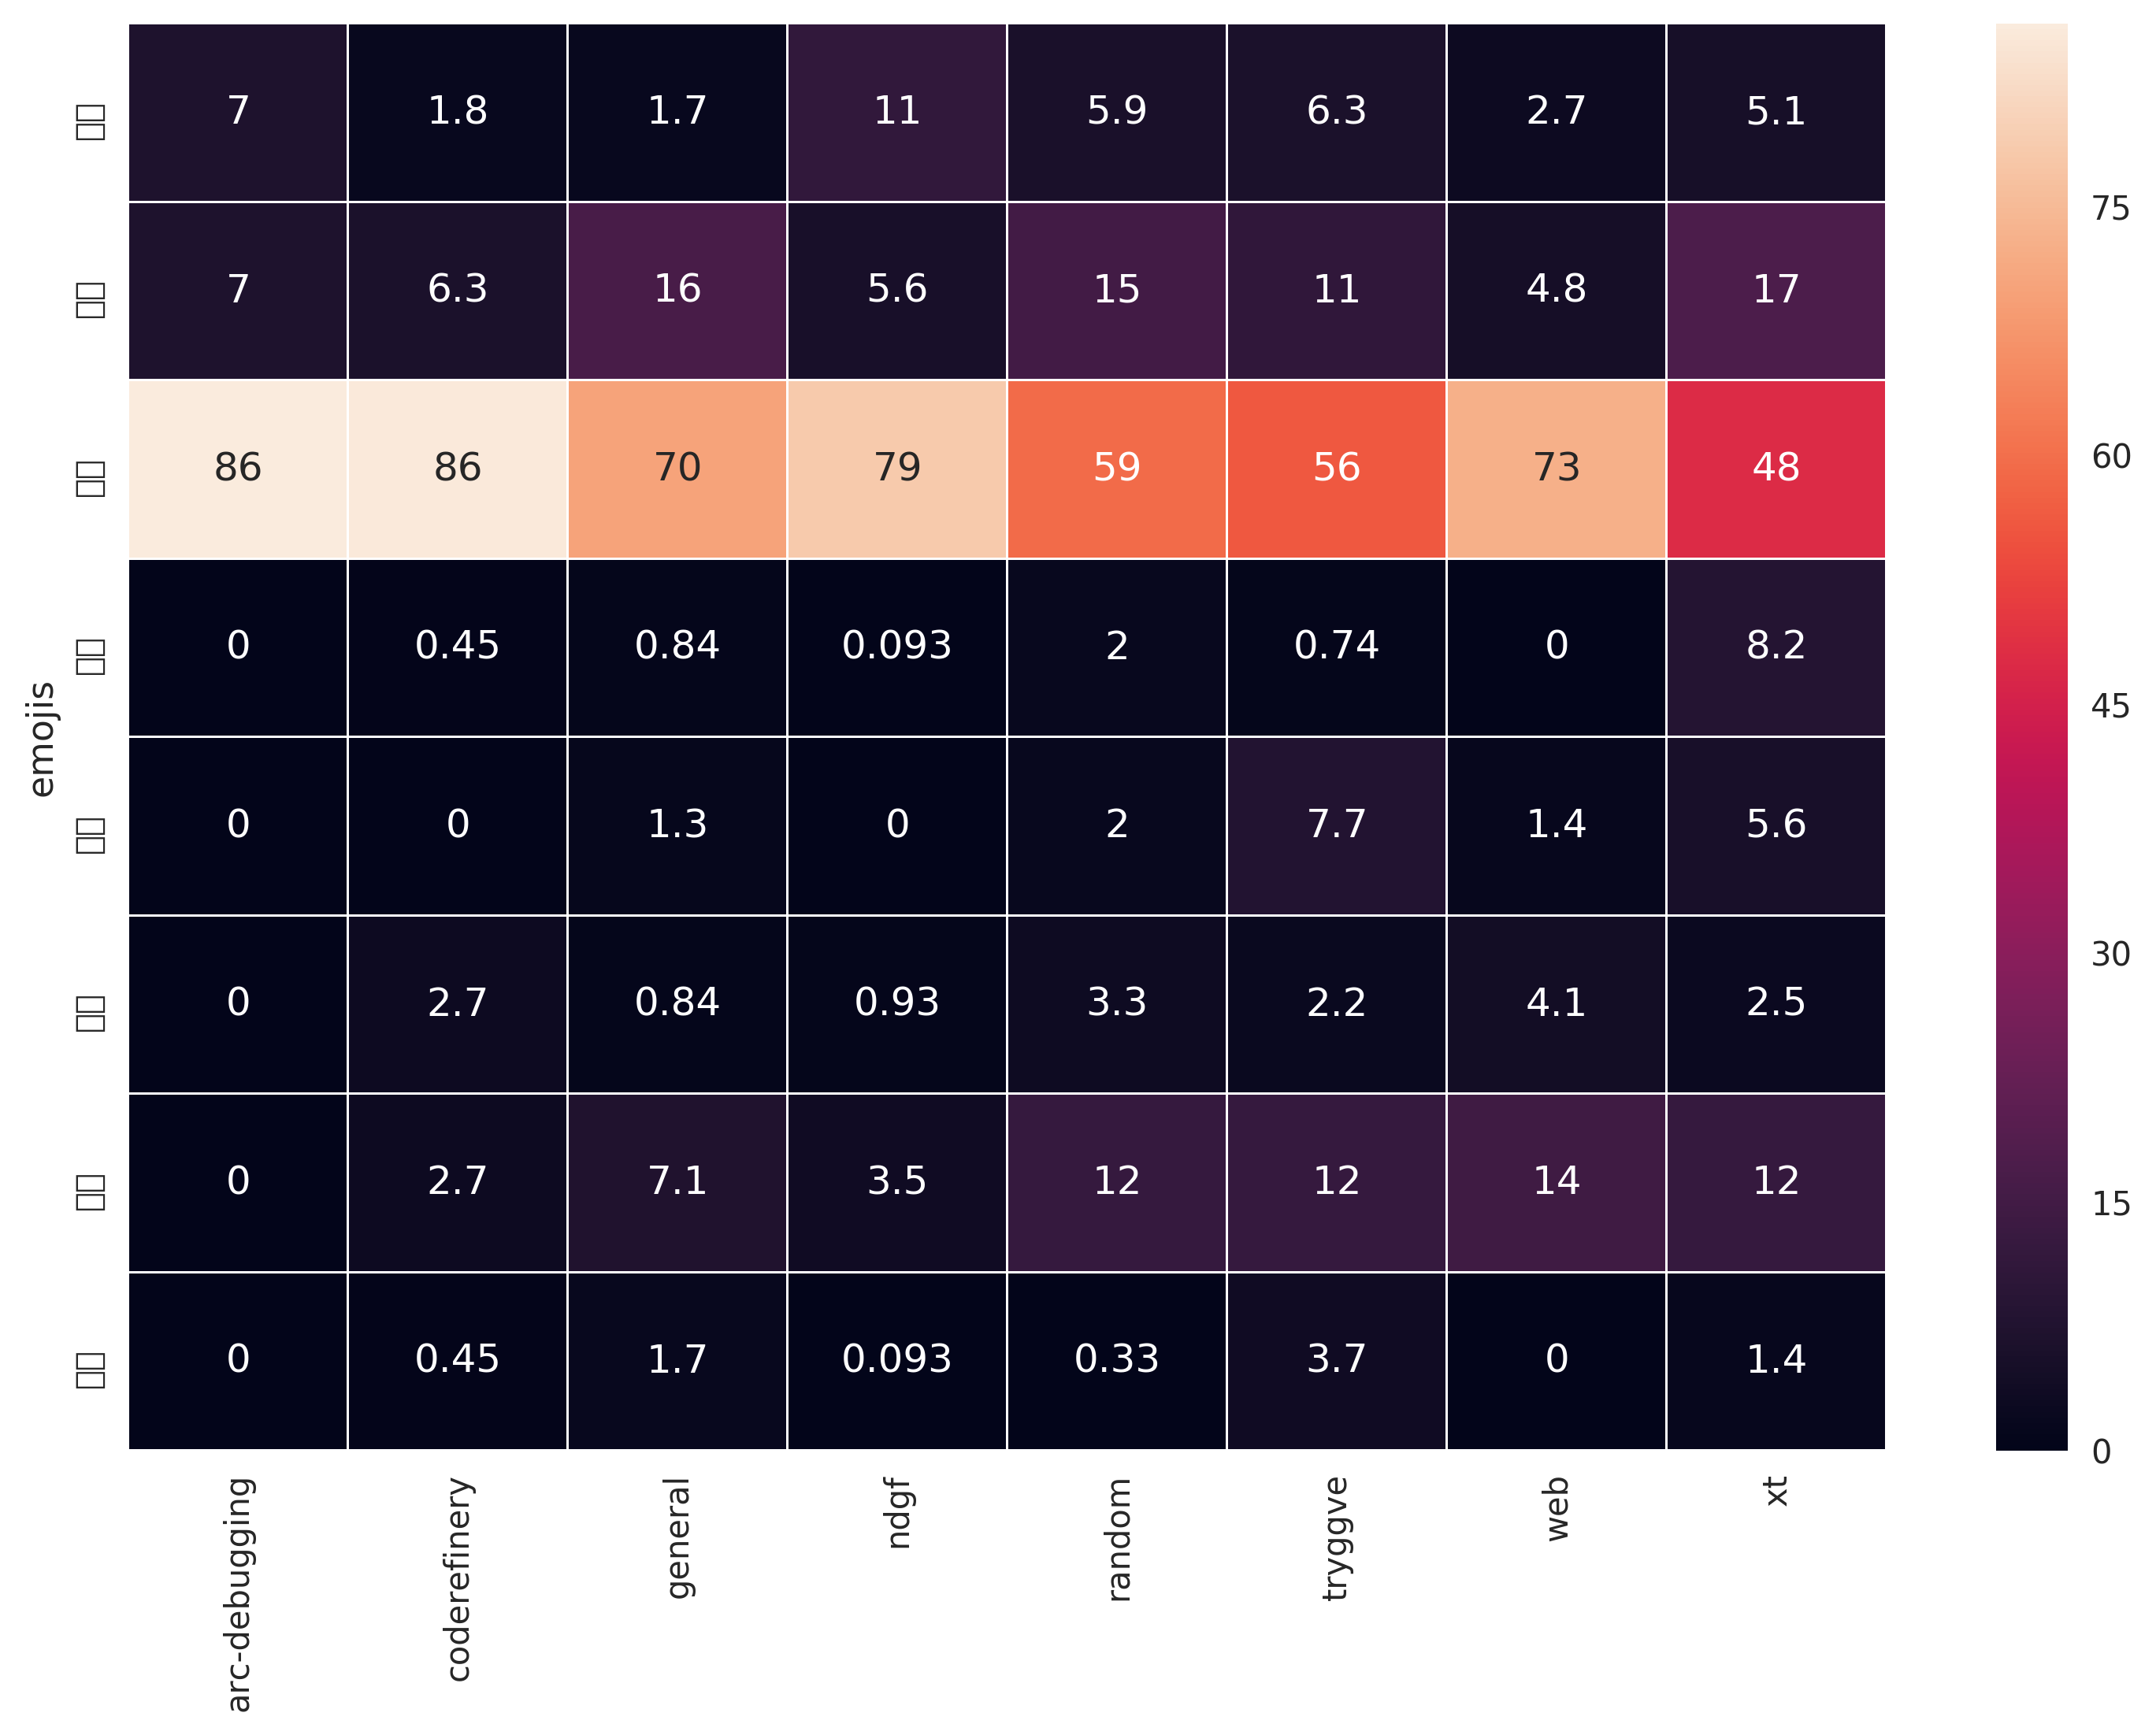

In [41]:
# don't really need a heatmap plot

#emojis currently don't work as y-labels
%matplotlib inline
##normalize:
plt.rcParams["figure.figsize"] = [12.0, 8.0]
plt.rcParams['figure.dpi'] = 300
sns.set(font='Segoe UI Emoji')
norm = 100*df_emojis / df_emojis.sum()

g = sns.heatmap(norm,linewidths=.5,annot=True,cbar=True)
plt.show()

### Topic modeling with latent Dirichlet allocation (LDA) 

We need to do some preprocessing

First join all words for each channel

In [42]:
joined_words_in_channels = dict.fromkeys(channels)
for i in channels:
    words = words_in_channels[i]
    joined_words_in_channels[i] = " ".join(words)


`textmining` is a useful package to create the [term-document matrix](https://en.wikipedia.org/wiki/Document-term_matrix)

In [43]:
import textmining

tdm = textmining.TermDocumentMatrix()
# add documents to the term-document matrix (each channel is a document)
for channel in channels:
    tdm.add_doc(joined_words_in_channels[channel])

# write term document matrix to csv file
tdm.write_csv('matrix.csv', cutoff=1)


In [44]:
vocab = list(tdm.rows(cutoff=1))[0]
titles = channels
X = np.array(list(tdm.rows(cutoff=1))[1:])

X.shape

(8, 34221)

In [45]:
import lda
n_topics = 20
model = lda.LDA(n_topics=n_topics, n_iter=1500, random_state=1)
model.fit(X)  # model.fit_transform(X) is also available


INFO:lda:n_documents: 8
INFO:lda:vocab_size: 34221
INFO:lda:n_words: 1719876
INFO:lda:n_topics: 20
INFO:lda:n_iter: 1500
INFO:lda:<0> log likelihood: -17681492
INFO:lda:<10> log likelihood: -15958305
INFO:lda:<20> log likelihood: -15206553
INFO:lda:<30> log likelihood: -14895994
INFO:lda:<40> log likelihood: -14693286
INFO:lda:<50> log likelihood: -14531915
INFO:lda:<60> log likelihood: -14394046
INFO:lda:<70> log likelihood: -14285999
INFO:lda:<80> log likelihood: -14179600
INFO:lda:<90> log likelihood: -14077542
INFO:lda:<100> log likelihood: -13976156
INFO:lda:<110> log likelihood: -13899171
INFO:lda:<120> log likelihood: -13819313
INFO:lda:<130> log likelihood: -13734086
INFO:lda:<140> log likelihood: -13661188
INFO:lda:<150> log likelihood: -13588003
INFO:lda:<160> log likelihood: -13531060
INFO:lda:<170> log likelihood: -13477129
INFO:lda:<180> log likelihood: -13417687
INFO:lda:<190> log likelihood: -13356809
INFO:lda:<200> log likelihood: -13311686
INFO:lda:<210> log likelihood

<lda.lda.LDA instance at 0x11ce5f998>

From the fit model we can look at the topic-words. Let's look at the top 15 words for each topic by probability

In [46]:
model.doc_topic_

array([[  2.16334846e-02,   1.65634213e-06,   1.65634213e-06,
          1.81834896e-01,   2.14015967e-02,   9.31377745e-02,
          8.44734488e-05,   1.47762282e-02,   4.68910458e-03,
          6.79100275e-05,   7.33925200e-03,   1.65634213e-06,
          1.65634213e-06,   8.56494518e-03,   5.54228641e-02,
          1.04200484e-02,   1.11407228e-01,   4.58657700e-02,
          5.15122404e-04,   4.22832676e-01],
       [  2.48811651e-02,   7.67117284e-03,   1.85416175e-05,
          6.65981189e-03,   3.64443920e-02,   8.73495601e-02,
          2.54525840e-04,   1.11150255e-01,   2.20156424e-02,
          1.35016687e-03,   1.05704076e-02,   6.77780400e-03,
          3.53976334e-05,   1.14132084e-02,   8.54279742e-02,
          3.09830428e-02,   3.25675083e-02,   6.44928025e-02,
          8.76681388e-03,   4.51169808e-01],
       [  5.33558399e-03,   2.20272580e-03,   1.45875880e-05,
          2.36249462e-03,   3.26213201e-02,   8.44280971e-02,
          6.94647050e-07,   2.99121966e-02

In [47]:
topic_word = model.topic_word_  # model.components_ also works
n_top_words = 20
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('*Topic {}\n- {}'.format(i, ' '.join(topic_words)))

*Topic 0
- the it to i is a that but and s t can on of for not in be you we
*Topic 1
- of a they s and was in time the you com but u www too your really had an http
*Topic 2
- ll nagios run srm pools alice host test upgrade wiki clom jobs chrulle yeah maybe petter thanks zanak cert hosts
*Topic 3
- tryggve u q s you hangout e com channel https amef kudos tsd d any data meeting sftp in mosler
*Topic 4
- lot getting didn last being off already actually user big system every far real case left started full said call
*Topic 5
- we u to can this https would do it one but i thanks ok need if think email a be
*Topic 6
- ku piggy java update petter meeting ood reboot logstash neic bccs next haproxy net slurm other ca saerda gw soon
*Topic 7
- neic of all your ahm has joel interesting channel slack wiki who nordic nordforsk j software any staff board please
*Topic 8
- and we will coderefinery i workshop people good git kv fvnv com meeting our github slightly smiling gitlab very workshops
*Topic

The other information we get from the model is document-topic probabilities

In [48]:
doc_topic = model.doc_topic_
for n in range(8):
    topic_most_pr = doc_topic[n].argmax()
    print("doc: {} topic: {}\n{}...".format(n,topic_most_pr,titles[n][:50]))

doc: 0 topic: 19
tryggve...
doc: 1 topic: 19
general...
doc: 2 topic: 19
xt...
doc: 3 topic: 19
web...
doc: 4 topic: 19
random...
doc: 5 topic: 0
arc-debugging...
doc: 6 topic: 0
ndgf...
doc: 7 topic: 19
coderefinery...


Ok, that wasn't interesting. The top topics are just help words

Let's plot the topics instead, and exclude topics 0 and 19

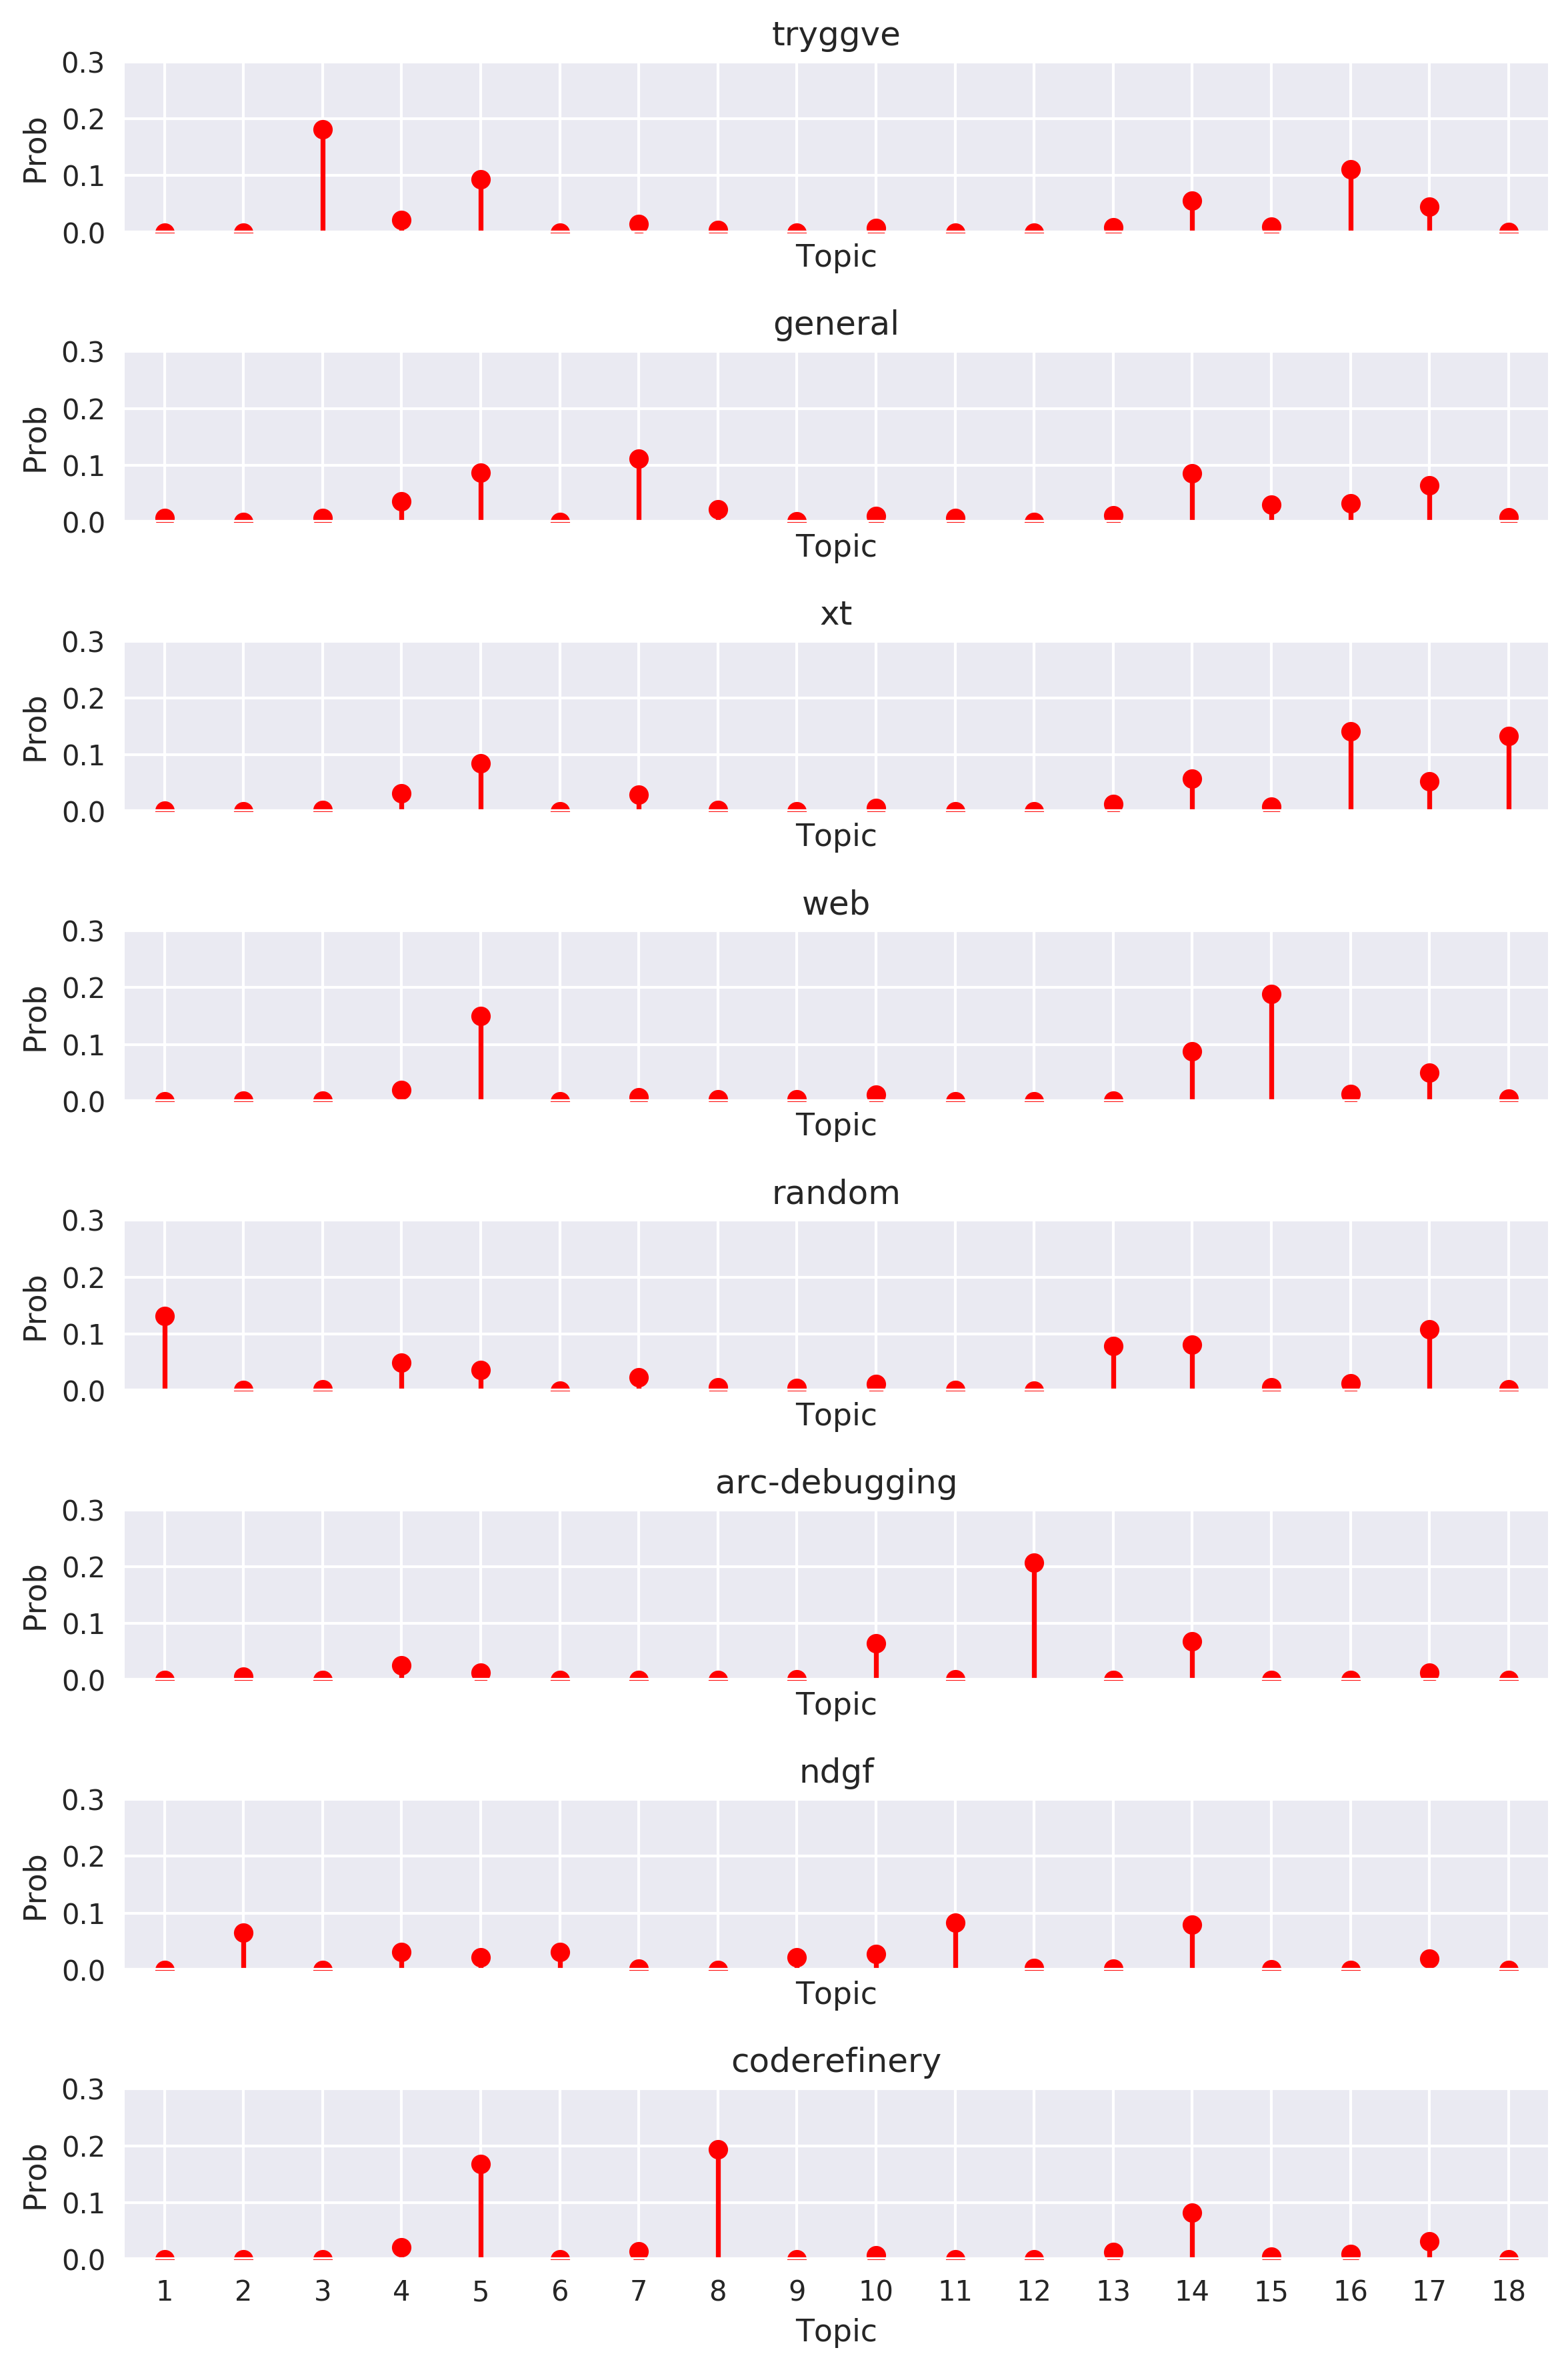

In [49]:
f, ax= plt.subplots(8, 1, figsize=(8, 12), sharex=True)
#for i, k in enumerate([0, 1, 2, 3, 4, 5, 6, 7]):
for i, k in enumerate(range(8)):
    ax[i].stem(doc_topic[k,:], linefmt='r-',
               markerfmt='ro', basefmt='w-')
    ax[i].set_xlim(0.5, 18.5)
    ax[i].set_xticks(range(1,19))
    ax[i].set_ylim(0, .3)
    ax[i].set_ylabel("Prob")
    ax[i].set_title("{}".format(channels[k]))

    ax[i].set_xlabel("Topic")

plt.tight_layout()
plt.show()

### Conclusions

- Clearly, different topics are being discussed in each channel